<a href="https://colab.research.google.com/github/naitsirCsineD/CMSG_estimacion/blob/main/Cristian_Basic_Actividad_1_Redes_Neuronales_Artificiales_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [6]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

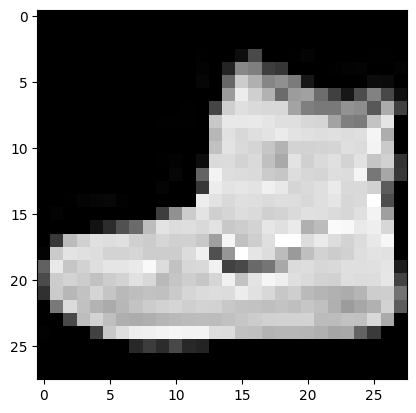

In [7]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [8]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [9]:
print(f'El grupo de entrenamiento contiene {len(training_images)} imagenes y el grupo de testeo contiene {len(test_images)} imágenes')
print(f'El tipo de valores de als imagenes es decimal (dtype = {training_images.dtype}) y el tipo de valores de las etiquetas es entero (dtype= {training_labels.dtype})')

print(f'Las imagenes de entrenamiento tiene {training_images.shape[1:][0]} x {training_images.shape[1:][1]} pixeles y las de testeo {test_images.shape[1:][0]} x {test_images.shape[1:][1]} pixeles')

El grupo de entrenamiento contiene 60000 imagenes y el grupo de testeo contiene 10000 imágenes
El tipo de valores de als imagenes es decimal (dtype = float64) y el tipo de valores de las etiquetas es entero (dtype= uint8)
Las imagenes de entrenamiento tiene 28 x 28 pixeles y las de testeo 28 x 28 pixeles


**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def histog(arr, titulo):
  # Plot the histogram
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax2.hist(arr)
  ax2.set_title(titulo)
  ax2.set_ylabel('frecuencia')

  # Set the axes labels
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  ax1.imshow(arr, cmap="gray")

  # Show the plot
  plt.tight_layout()
  plt.show()

def histo2(arr,titulo):

  # Plot the histogram
  plt.hist(arr)

  # Set the title and axes labels
  plt.title(titulo)
  plt.xlabel("Valores")
  plt.ylabel("Frecuencia")

  # Show the plot
  plt.show()

def unique_values(vector):
  # Create an empty set to store unique values
  unique_values_set = set()

  # Iterate through the vector and add each value to the set
  for value in vector:
    unique_values_set.add(value)

  # Convert the set to a list and return it
  return list(unique_values_set)

def plot1(historia):
  pd.DataFrame(historia.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()


La imagen 17916 del la variable training_images es un <class 'numpy.ndarray'> y la imagen 4574 variable test_images es <class 'numpy.ndarray'>


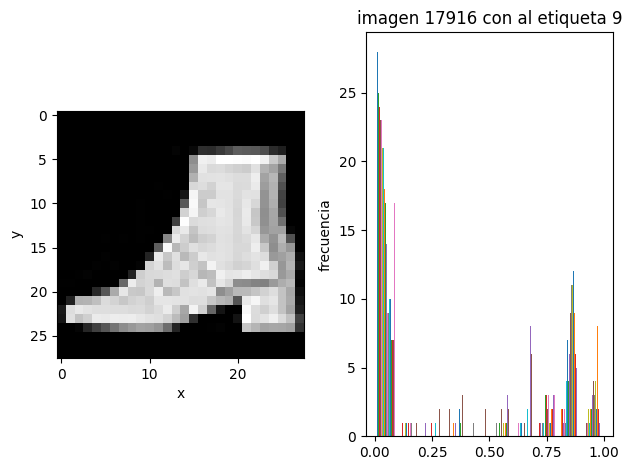

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


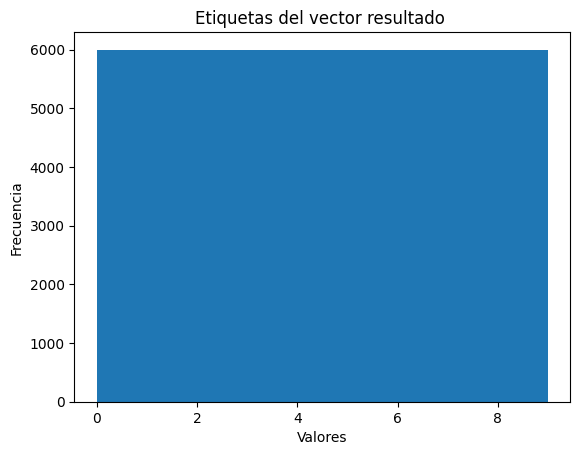

In [11]:
### Tu código aquí ###
import random as rnd
n=rnd.randint(0,len(training_images)-1)
m=rnd.randint(0,len(test_images)-1)
print(f'La imagen {n} del la variable training_images es un {type(training_images[n])} y la imagen {m} variable test_images es {type(test_images[m])}')
tit=str(f'imagen {n} con al etiqueta {training_labels[n]}')
histog(training_images[n],tit)
print(unique_values(training_labels))
tit2=str(f'Etiquetas del vector resultado ')
histo2(training_labels,tit2)


## Datos de entrada (input)
el dataset de entrada es una matriz de valores coordenados en xy de 60 mil imágenes de 28x28 pixeles, con valores, que fueron normalizados a entre 0 y 1.
## Datos de salida (output)
El dataset _labels es la salida, siendo este un vector que contiene un valor entero que representa una de las categorias. Existen 10 valores de categoría, que van desde el 0 al 9.



Una observación del histograma de del vector "labels" muestra que el dataset esta balanceado en sus respuestas, osea existe igual numero de respuestas de cada categoría.

## 2. Creación del Modelo

In [12]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [22]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def __init__(self, loss_limit=0.01,accuracy_limit=0.99):
        super(myCallback, self).__init__()
        # Establece el límite de pérdida como porcentaje (40% por defecto)
        self.loss_limit = loss_limit
        self.accuracy_limit=accuracy_limit

    def on_epoch_end(self, epoch, logs=None):
        # Verifica si la pérdida en el entrenamiento ha caído por debajo del límite especificado
        if logs.get('loss') < self.loss_limit:
            print(f"\nAlcanzado el {self.loss_limit*100}% de pérdida, deteniendo entrenamiento...")
            self.model.stop_training = True

    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')> self.accuracy_limit):
            print(f"\nAlcanzado el {self.accuracy_limit*100}% de precisión, se cancela el entrenamiento!!")
            self.model.stop_training = True


def Modelo_1(nh1,input, output, nepoch,opc=1):
  n_out=len(unique_values(training_labels))
  model1=keras.models.Sequential()
  if opc==1:
    model1.add(keras.layers.Flatten(input_shape=[28,28]))
  model1.add(keras.layers.Dense(nh1,activation="relu"))
  model1.add(keras.layers.Dense(nh1,activation="relu"))
  model1.add(keras.layers.Dense(n_out,activation="softmax"))
  unique_values(output)
  print('_'*100)
  print(f'Conexiones de la capa Entrada :{input.shape[1:][0]}x{input.shape[1:][1]}={input.shape[1:][0]*input.shape[1:][1]}')
  print(f'Conexiones de la capa Oculta :{input.shape[1:][0]}x{input.shape[1:][1]} * {nh1} + {nh1}={input.shape[1:][0]*training_images.shape[1:][1]*nh1+nh1}')
  print(f'Conexiones de la capa Salida :{len(unique_values(output))} * {nh1} + {len(unique_values(output))}={len(unique_values(output))*nh1+len(unique_values(output))}')
  print('='*100)
  #Resumen de Modelo_2
  model1.summary()
  print('_'*100)
  print('Nombre de cada Capa')
  for lyr in model1.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Compile the model
  model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  # Train the model
  history=model1.fit(training_images, training_labels, epochs=nepoch, batch_size=64, verbose=1, callbacks=[callbacks])

  for lyr in model1.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Evaluate the model
  test_loss, test_acc = model1.evaluate(test_images, test_labels)
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")
  plot1(history)
  return model1,test_loss,test_acc



def Modelo_1b(nh1,input, output, nepoch,activacion="relu"):
  n_out=len(unique_values(training_labels))
  model1=keras.models.Sequential()
  model1.add(keras.layers.Flatten(input_shape=[28,28]))
  model1.add(keras.layers.Dense(nh1,activation=activacion))
  model1.add(keras.layers.Dense(nh1,activation=activacion))
  model1.add(keras.layers.Dense(n_out,activation="softmax"))
  unique_values(output)
  print('_'*100)
  print(f'Conexiones de la capa Entrada :{input.shape[1:][0]}x{input.shape[1:][1]}={input.shape[1:][0]*input.shape[1:][1]}')
  print(f'Conexiones de la capa Oculta :{input.shape[1:][0]}x{input.shape[1:][1]} * {nh1} + {nh1}={input.shape[1:][0]*training_images.shape[1:][1]*nh1+nh1}')
  print(f'Conexiones de la capa Salida :{len(unique_values(output))} * {nh1} + {len(unique_values(output))}={len(unique_values(output))*nh1+len(unique_values(output))}')
  print('='*100)
  #Resumen de Modelo_2
  model1.summary()
  print('_'*100)
  print('Nombre de cada Capa')
  for lyr in model1.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Compile the model
  model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  # Train the model
  history=model1.fit(training_images, training_labels, epochs=nepoch, batch_size=64, verbose=1, callbacks=[callbacks])

  for lyr in model1.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Evaluate the model
  test_loss, test_acc = model1.evaluate(test_images, test_labels)
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")
  plot1(history)
  return model1,test_loss,test_acc




def Modelo_2(nh1,input, output, nepoch):
  n_out=len(unique_values(training_labels))
  model2=keras.models.Sequential()
  model2.add(keras.layers.Flatten(input_shape=[28,28]))
  model2.add(keras.layers.Dense(nh1,activation="relu"))
  #model2.add(keras.layers.Dense(300,activation="relu"))
  model2.add(keras.layers.Dense(n_out,activation="softmax"))
  unique_values(output)
  print('_'*100)
  print(f'Conexiones de la capa Entrada :{input.shape[1:][0]}x{input.shape[1:][1]}={input.shape[1:][0]*input.shape[1:][1]}')
  print(f'Conexiones de la capa Oculta :{input.shape[1:][0]}x{input.shape[1:][1]} * {nh1} + {nh1}={input.shape[1:][0]*training_images.shape[1:][1]*nh1+nh1}')
  print(f'Conexiones de la capa Salida :{len(unique_values(output))} * {nh1} + {len(unique_values(output))}={len(unique_values(output))*nh1+len(unique_values(output))}')
  print('='*100)
  #Resumen de Modelo_2
  model2.summary()
  print('_'*100)
  print('Nombre de cada Capa')
  for lyr in model2.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Compile the model
  model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  # Train the model
  history=model2.fit(training_images, training_labels, epochs=nepoch, batch_size=64, verbose=1, callbacks=[callbacks])

  for lyr in model2.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Evaluate the model
  test_loss, test_acc = model2.evaluate(test_images, test_labels)
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")
  plot1(history)
  return model2,test_loss,test_acc



def Modelo_3(nh1,nh2, input1, output, nepoch):
  n_out=len(unique_values(training_labels))
  model3=keras.models.Sequential()
  model3.add(keras.layers.Flatten(input_shape=[28,28]))
  model3.add(keras.layers.Dense(nh1,activation="relu"))
  model3.add(keras.layers.Dense(nh2,activation="relu"))
  model3.add(keras.layers.Dense(n_out,activation="softmax"))
  unique_values(output)
  print('_'*100)
  print(f'Conexiones de la capa Entrada :{input1.shape[1:][0]}x{input1.shape[1:][1]}={input1.shape[1:][0]*input1.shape[1:][1]}')
  print(f'Conexiones de la capa Oculta :{input1.shape[1:][0]}x{input1.shape[1:][1]} * {nh1} + {nh1}={input1.shape[1:][0]*training_images.shape[1:][1]*nh1+nh1}')
  print(f'Conexiones de la capa Oculta :{input1.shape[1:][0]}x{input1.shape[1:][1]} * {nh2} + {nh2}={input1.shape[1:][0]*training_images.shape[1:][1]*nh2+nh2}')
  print(f'Conexiones de la capa Salida :{len(unique_values(output))} * {nh1} + {len(unique_values(output))}={len(unique_values(output))*nh1+len(unique_values(output))}')
  print('='*100)
  #Resumen de Modelo_2
  model3.summary()
  print('_'*100)
  print('Nombre de cada Capa')
  for lyr in model3.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Compile the model
  model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  # Train the model
  history=model3.fit(training_images, training_labels, epochs=nepoch, batch_size=64, verbose=1, callbacks=[callbacks])

  for lyr in model3.layers:
    print(f'{lyr.name} {lyr.__class__.__name__}')
    if lyr.__class__.__name__ == 'Dense':
      weights,bias=lyr.get_weights()
      histog(weights,'Pesos')
      histo2(bias,'Sesgos')

  # Evaluate the model
  test_loss, test_acc = model3.evaluate(test_images, test_labels)
  print(f"Test loss: {test_loss}")
  print(f"Test accuracy: {test_acc}")
  plot1(history)
  return model3,test_loss,test_acc



2.15.0


____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 128 + 128=100480
Conexiones de la capa Salida :10 * 128 + 10=1290
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
________________________________

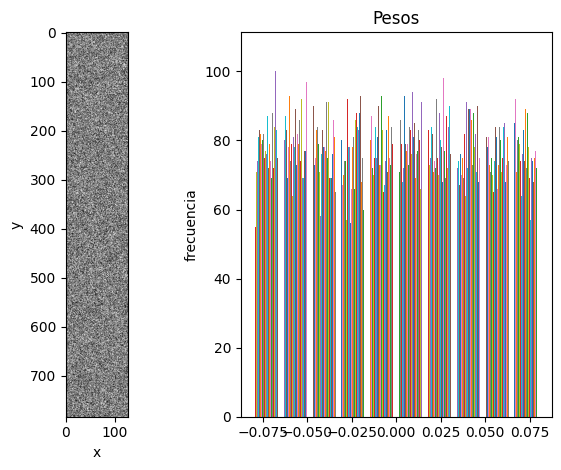

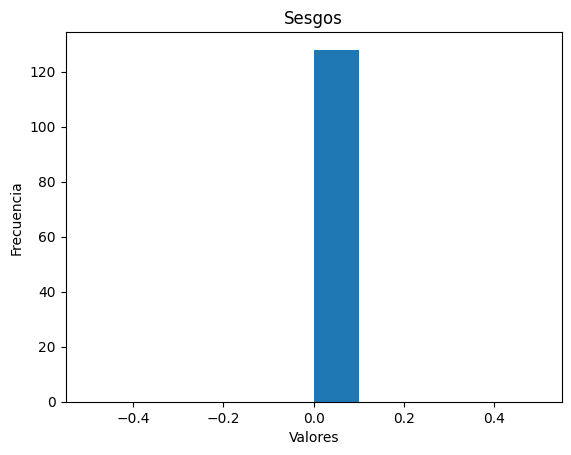

dense_22 Dense


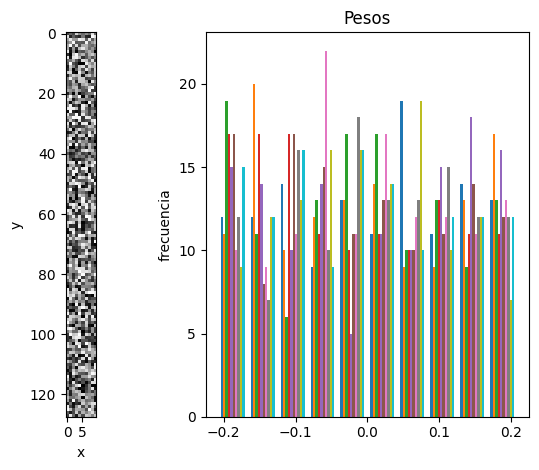

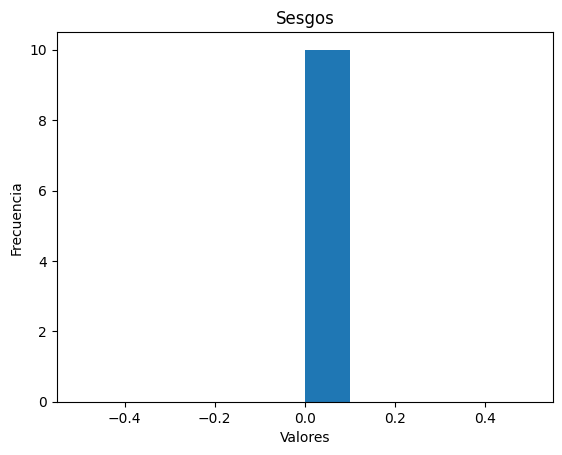

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5192 - accuracy: 0.8184
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3884 - accuracy: 0.8616
Epoch 3/10
938/938 [==============================] - ETA: 0s - loss: 0.3462 - accuracy: 0.8747
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 4s 4ms/step - loss: 0.3462 - accuracy: 0.8747
flatten_9 Flatten
dense_21 Dense


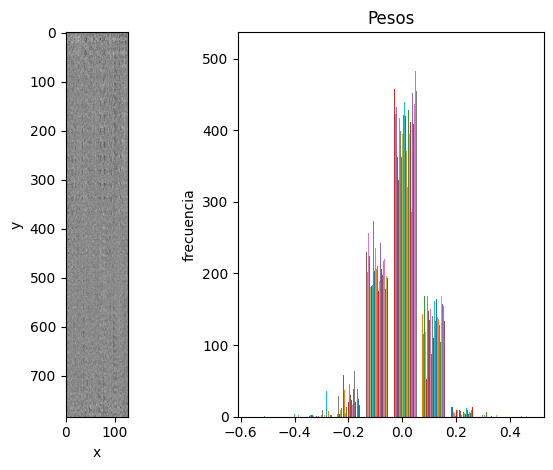

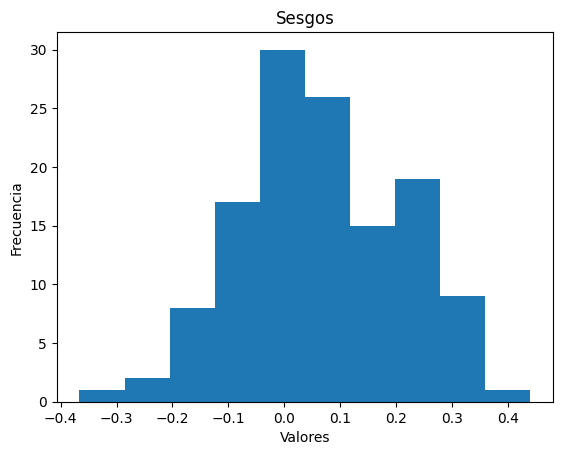

dense_22 Dense


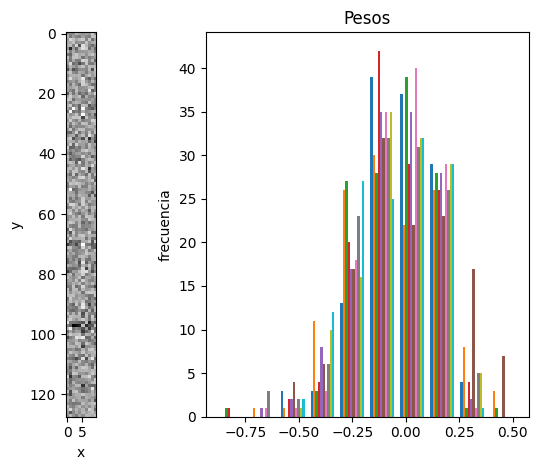

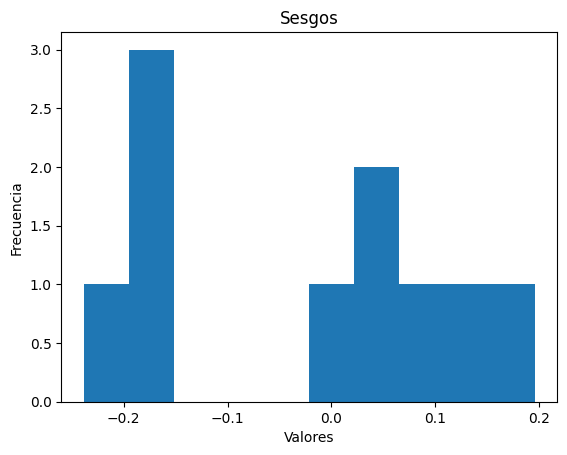

313/313 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8638
Test loss: 0.37767884135246277
Test accuracy: 0.8637999892234802


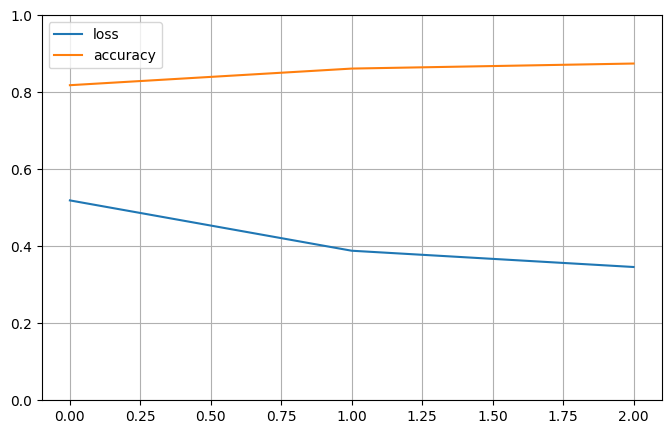

In [23]:
nh1=128
epoch=10
RN1,RN1_testlost,RN1_test_acc=Modelo_2(128,training_images,training_labels,10)

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [24]:
n_total=6
n_test=rnd.sample(range(0,len(training_images)-1),n_total)
n_test

[49294, 7365, 47572, 55049, 44857, 30128]

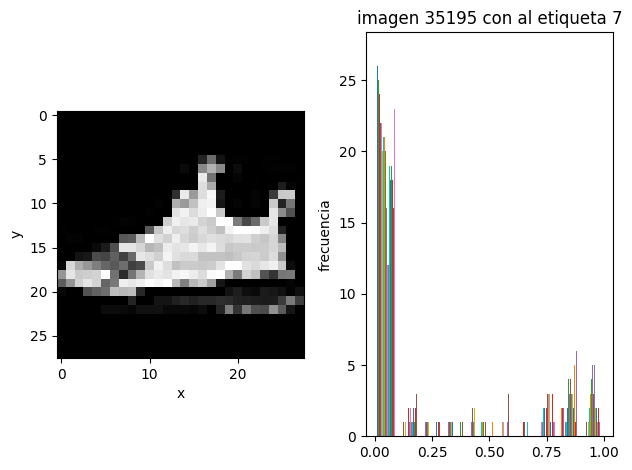

(28, 28)
1/1 [==============================] - 0s 145ms/step
Clase Predicha: 7 Clase real: 7


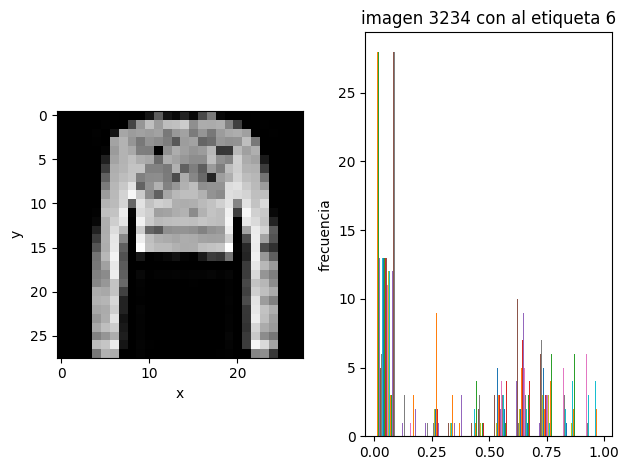

(28, 28)
1/1 [==============================] - 0s 26ms/step
Clase Predicha: 2 Clase real: 6


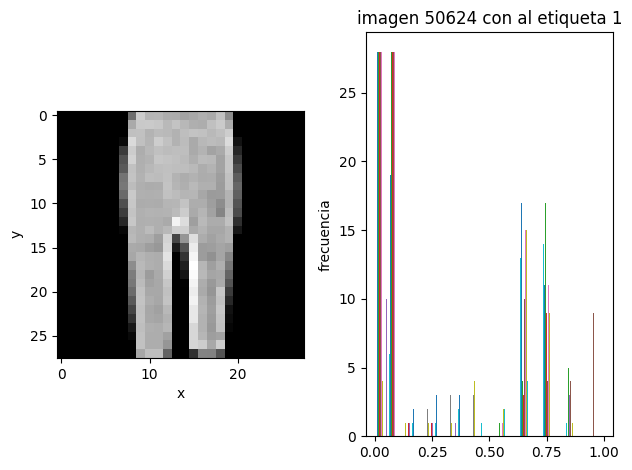

(28, 28)
1/1 [==============================] - 0s 21ms/step
Clase Predicha: 1 Clase real: 1


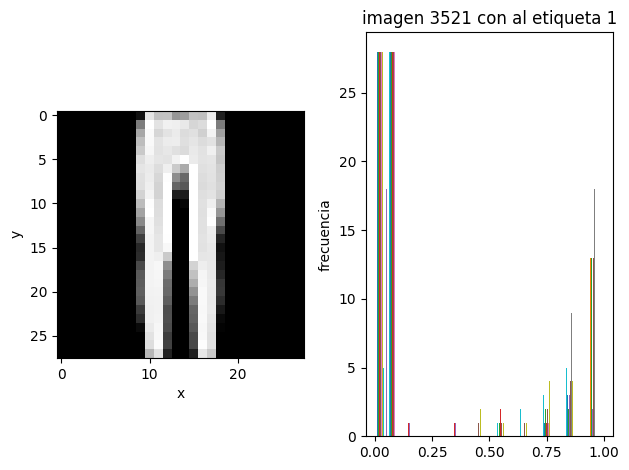

(28, 28)
1/1 [==============================] - 0s 20ms/step
Clase Predicha: 1 Clase real: 1


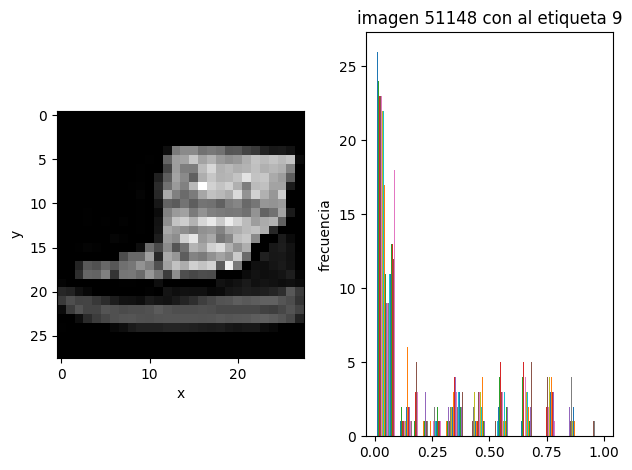

(28, 28)
1/1 [==============================] - 0s 23ms/step
Clase Predicha: 9 Clase real: 9


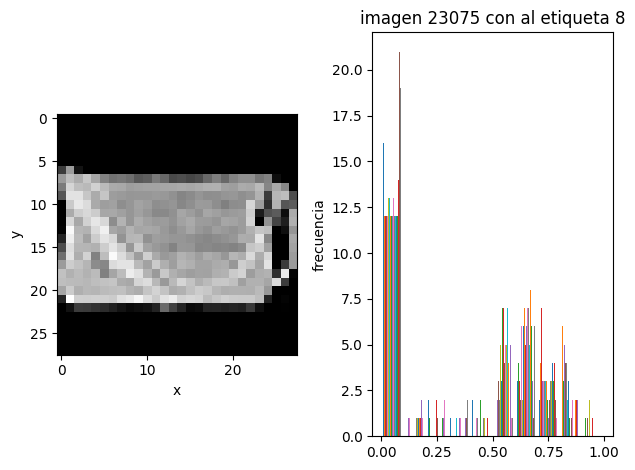

(28, 28)
1/1 [==============================] - 0s 22ms/step
Clase Predicha: 8 Clase real: 8
La red neuronal ha determinado una exactitud de 0.8637999892234802 y el muestreo aleatorio de 6 imagenes [35195, 3234, 50624, 3521, 51148, 23075] estima que 5/6 (0.8333333333333334) fueron clasificados correctamente


In [25]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
n_total=6
n_test=rnd.sample(range(0,len(training_images)-1),n_total)
sum=0
for n in n_test:
  tit=str(f'imagen {n} con al etiqueta {training_labels[n]}')
  histog(training_images[n],tit)
  print(training_images[n].shape)
  prediction=RN1.predict(training_images[n].reshape(1, 28,28))
  predicted_class = np.argmax(prediction)
  print(f"Clase Predicha: {predicted_class} Clase real: {training_labels[n]}")
  if predicted_class == training_labels[n]:
    sum+=1

print(f'La red neuronal ha determinado una exactitud de {RN1_test_acc} y el muestreo aleatorio de {n_total} imagenes {n_test} estima que {sum}/{n_total} ({sum/n_total}) fueron clasificados correctamente')




Las imagenes muestreadas indican que 4/6 66% fueron correctamete muestreadas lo que es menor al 88% estimado en el entrenamiento y menor a el objetivo planteado 80%.

Por lo tanto, se puede concluir que la red neuronal entrenada "RN1" no satisface el objetivo planteado y que el indicador de precisión no asegura un valor mínimo de precisión.

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos:

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones.

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números,
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [26]:
print(prediction)
print(f'Suma de los elementos del array: {np.sum(prediction)}')
print(RN1.layers[2])
print(f'Vector Clases {unique_values(training_labels)}')

[[1.16477995e-05 2.54204782e-08 6.40236294e-07 1.14017276e-08 3.01433225e-08 1.10755027e-05 2.63547599e-06 4.27240764e-07 9.99973536e-01 1.87777367e-08]]
Suma de los elementos del array: 1.0
Vector Clases [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Este vector es producto de al ultima capa de RN1, que tiene como salida 10 neuronas y sus valores depnenden de la función de activación "softmax" que pondera todos los pesos y sesgos, para que la suma de lso elementos totalice 1

El primer elemento de del vector es la clase 0



# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 512 + 512=401920
Conexiones de la capa Salida :10 * 512 + 10=5130
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
___________________________________

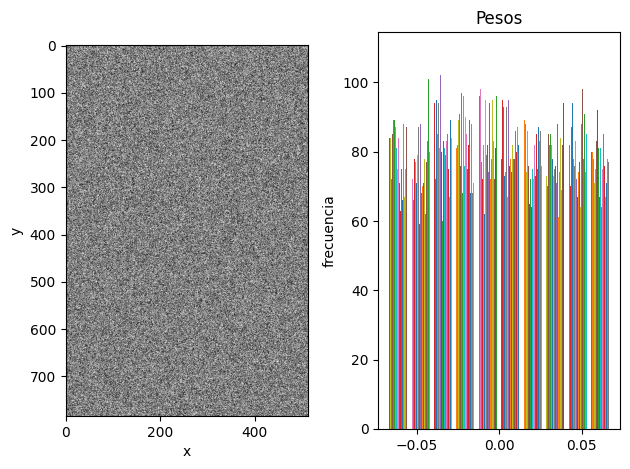

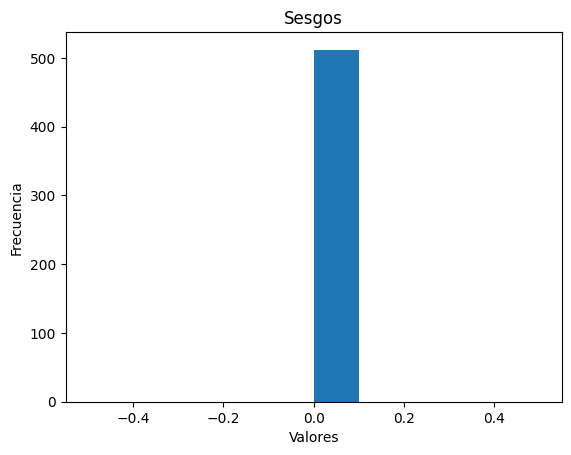

dense_24 Dense


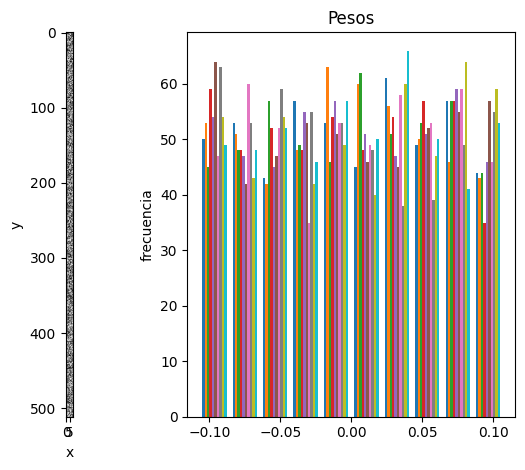

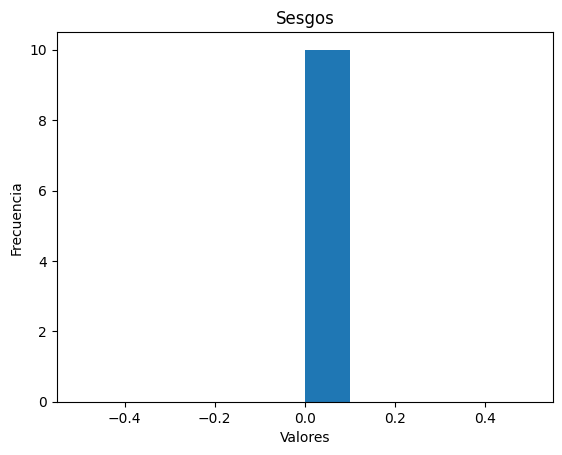

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4878 - accuracy: 0.8269
Epoch 2/10
937/938 [============================>.] - ETA: 0s - loss: 0.3583 - accuracy: 0.8702
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 8s 9ms/step - loss: 0.3584 - accuracy: 0.8702
flatten_10 Flatten
dense_23 Dense


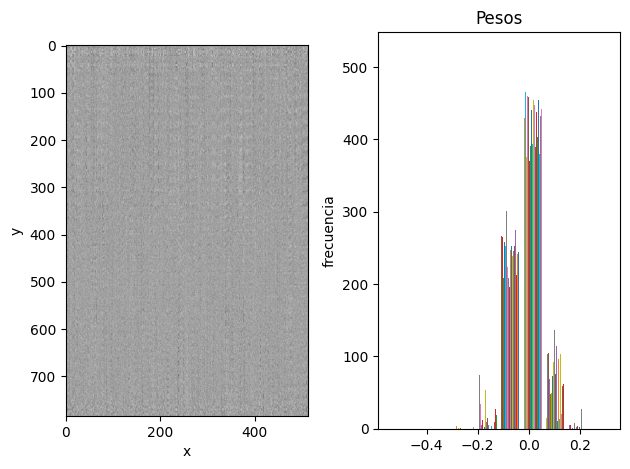

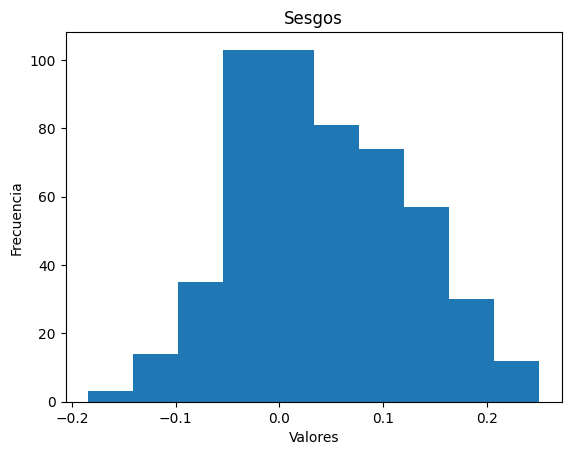

dense_24 Dense


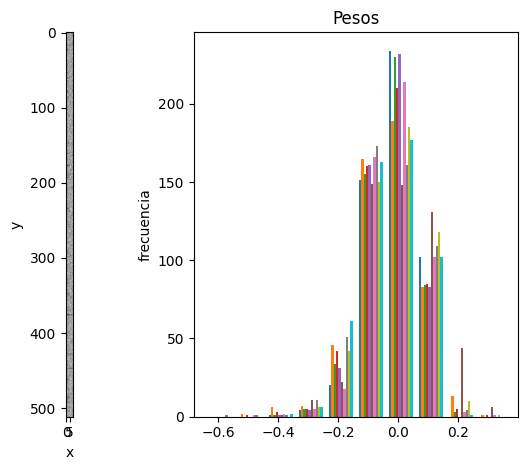

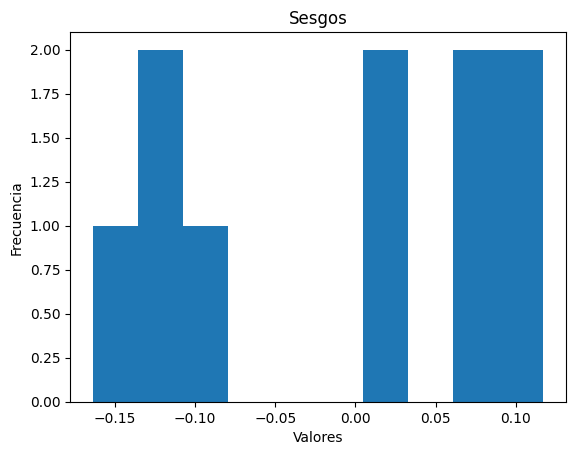

313/313 [==============================] - 2s 4ms/step - loss: 0.3737 - accuracy: 0.8666
Test loss: 0.37371984124183655
Test accuracy: 0.866599977016449


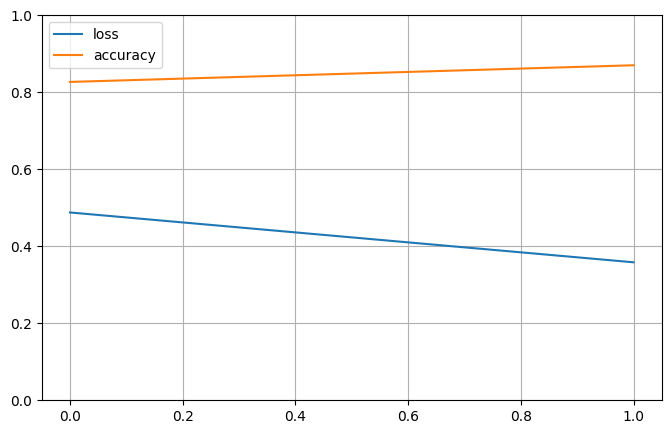

In [27]:
### Tu código para 512 neuronas aquí ###
nh1=512
epoch=10
RN512,RN512_testlost,RN512_test_acc=Modelo_2(nh1,training_images,training_labels,10)

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 1024 + 1024=803840
Conexiones de la capa Salida :10 * 1024 + 10=10250
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 1024)              803840    
                                                                 
 dense_28 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814090 (3.11 MB)
Trainable params: 814090 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
_______________________________

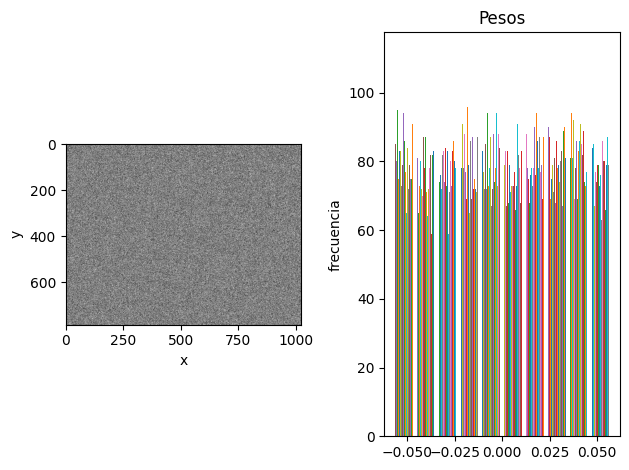

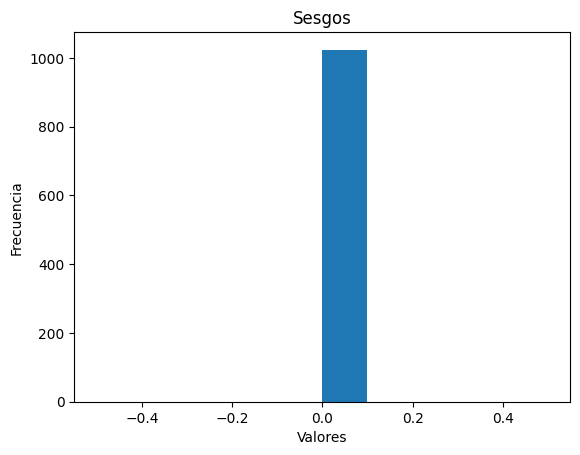

dense_28 Dense


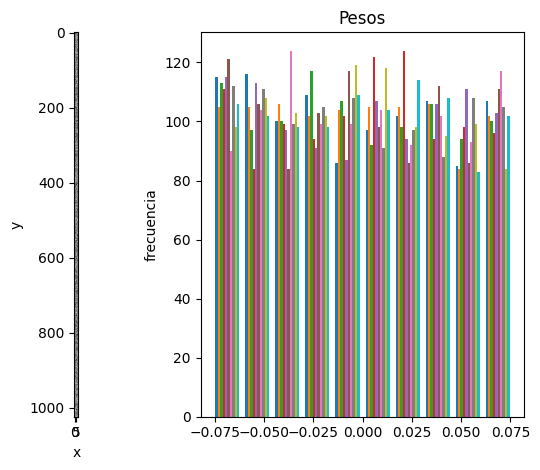

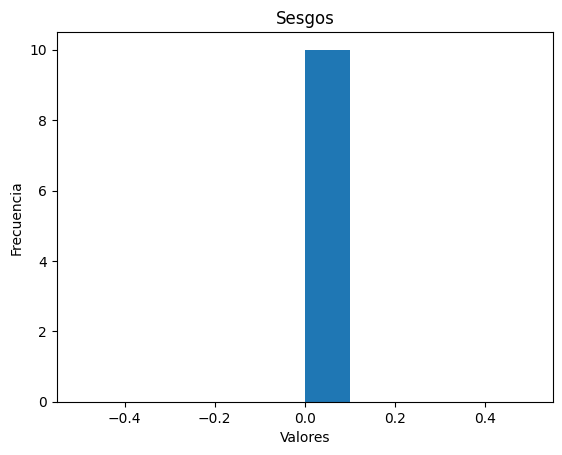

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 0.4751 - accuracy: 0.8302
Epoch 2/10
938/938 [==============================] - ETA: 0s - loss: 0.3566 - accuracy: 0.8701
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 14s 15ms/step - loss: 0.3566 - accuracy: 0.8701
flatten_12 Flatten
dense_27 Dense


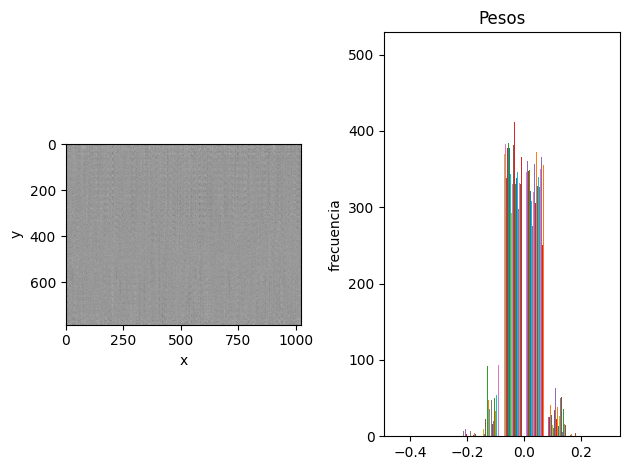

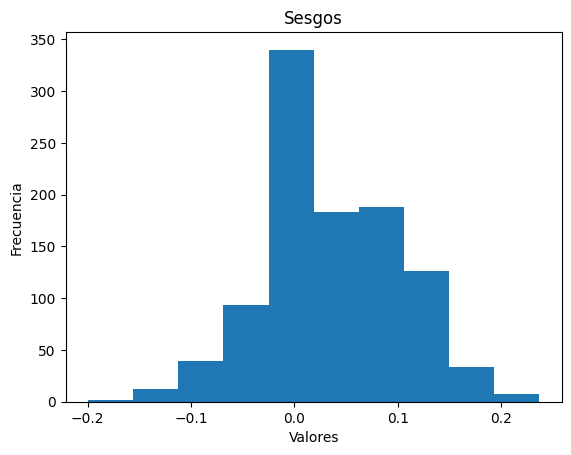

dense_28 Dense


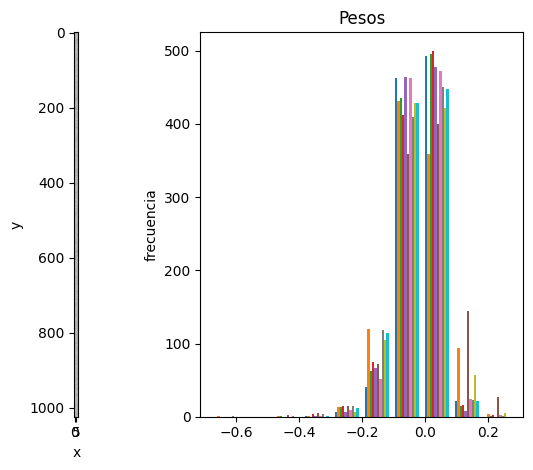

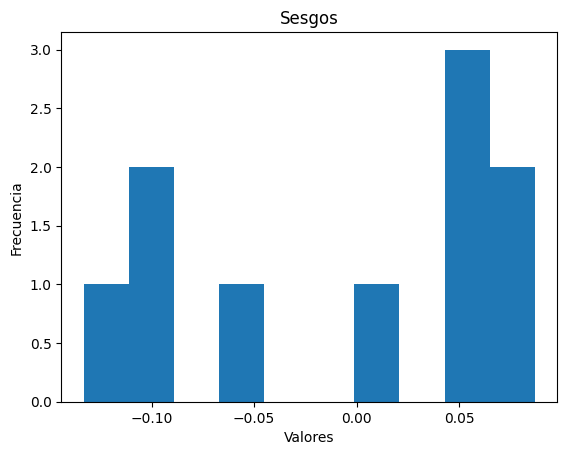

313/313 [==============================] - 1s 4ms/step - loss: 0.4004 - accuracy: 0.8502
Test loss: 0.4004383385181427
Test accuracy: 0.8501999974250793


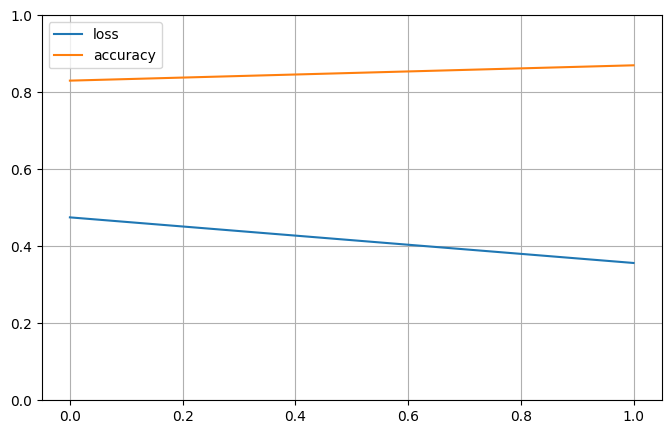

In [29]:
### Tu código para 1024 neuronas aquí ###

nh1=1024
epoch=10
RN1024,RN1024_testlost,RN1024_test_acc=Modelo_2(nh1,training_images,training_labels,10)

**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí:

***resultados de redes neuronales**

Red Neuronal 1, epocas, perdidas, precisión: 512, 10, 0.33, 0.879
Red Neuronal 2, epocas, perdidas, precisión: 1024, 10, 0.33, 0.887

*** discusión de resultados**
Se aprecia en las dos redes un aumento insignificante en de la precisión de las predicciones.

*** conclusión**

No vale la pena aumentar el numero de neuronas en 1 capa, porque el esfuerzo computacional sólo tiene un efecto insignificante.


Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**:

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**:

* ¿Porque crees que ha ocurrido esto?

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 512 + 512=401920
Conexiones de la capa Oculta :28x28 * 1024 + 1024=803840
Conexiones de la capa Salida :10 * 512 + 10=5130
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 1024)              525312    
                                                                 
 dense_34 (Dense)            (None, 10)                10250     
                                                                 
Total params: 

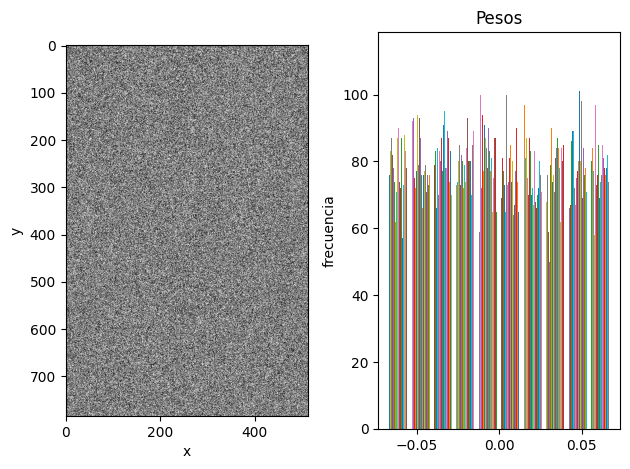

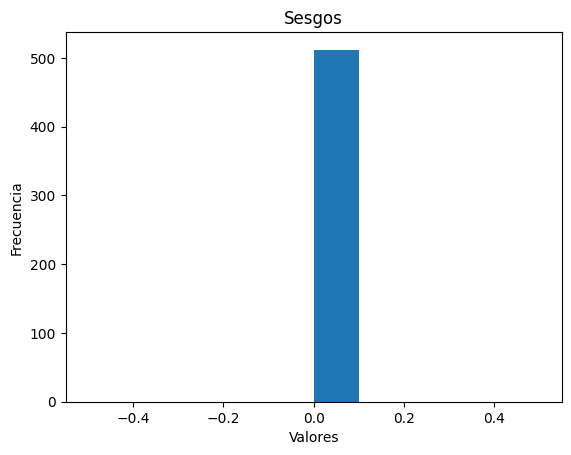

dense_33 Dense


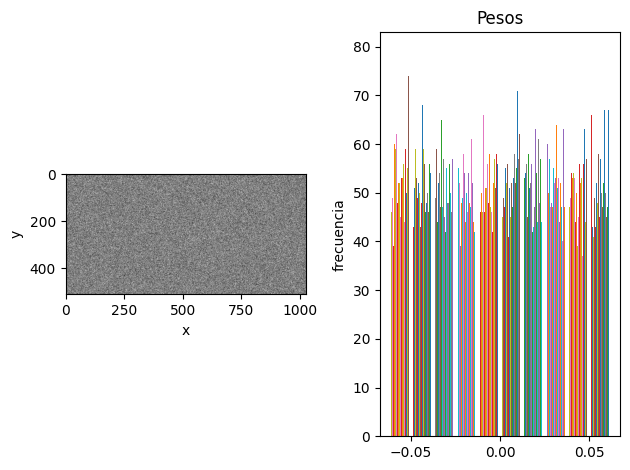

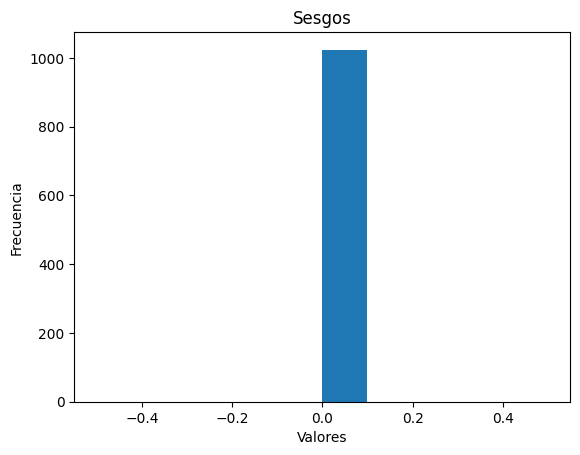

dense_34 Dense


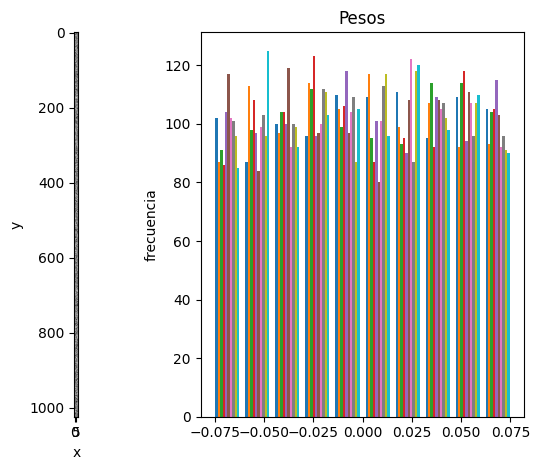

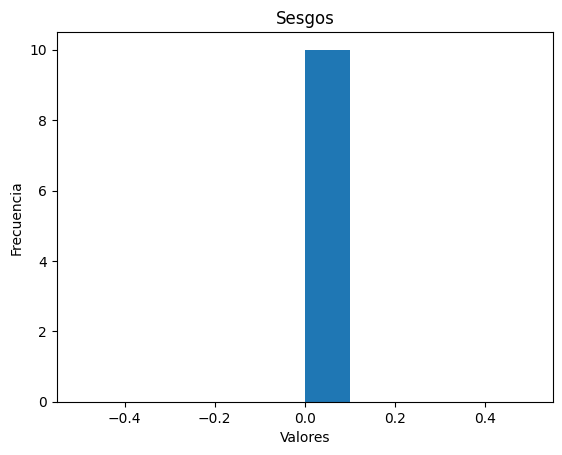

Epoch 1/10
938/938 [==============================] - 22s 23ms/step - loss: 0.4637 - accuracy: 0.8312
Epoch 2/10
936/938 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8702
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 20s 21ms/step - loss: 0.3532 - accuracy: 0.8702
flatten_14 Flatten
dense_32 Dense


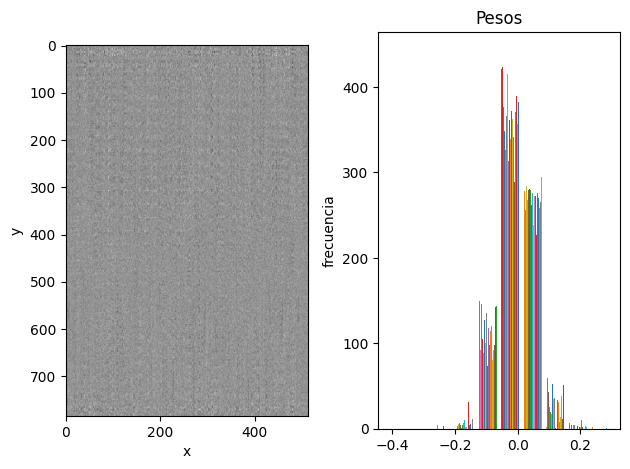

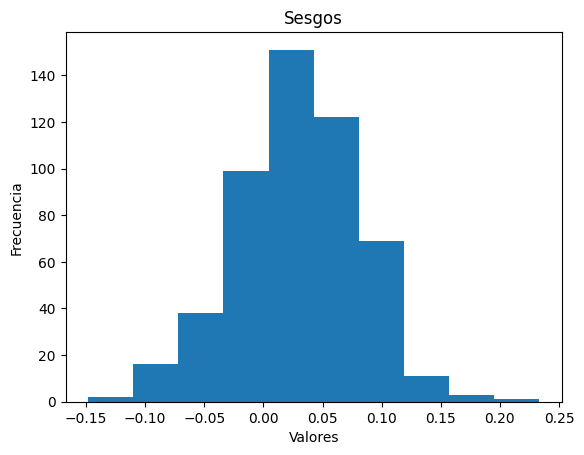

dense_33 Dense


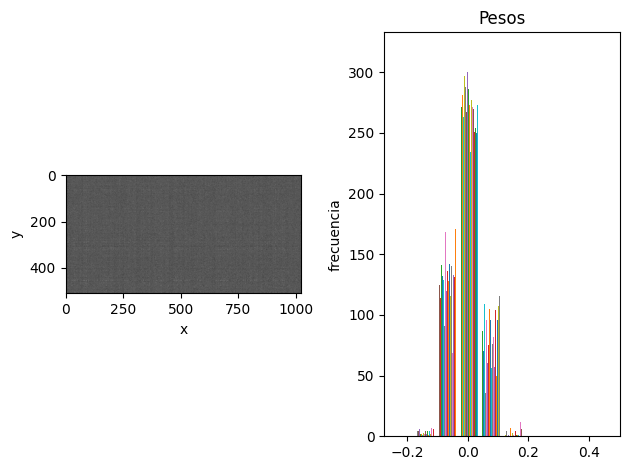

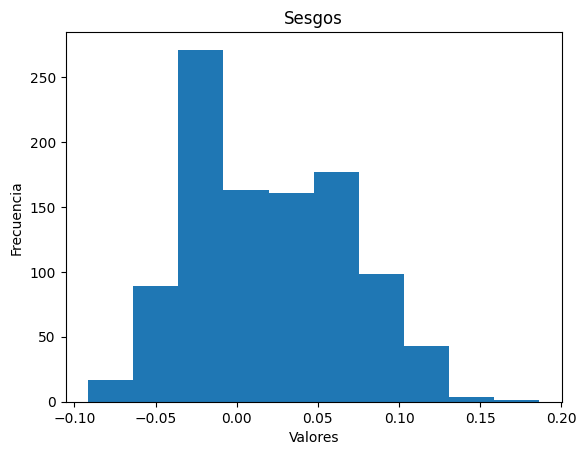

dense_34 Dense


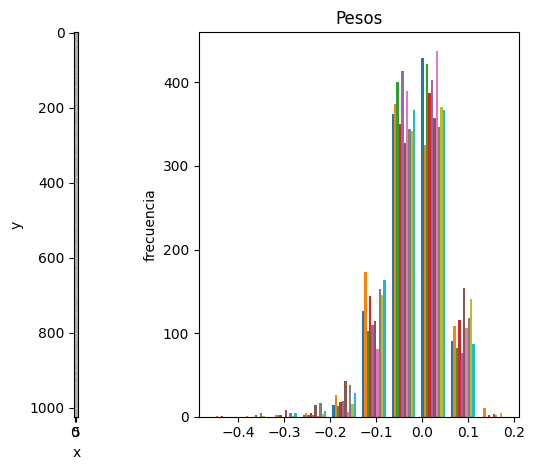

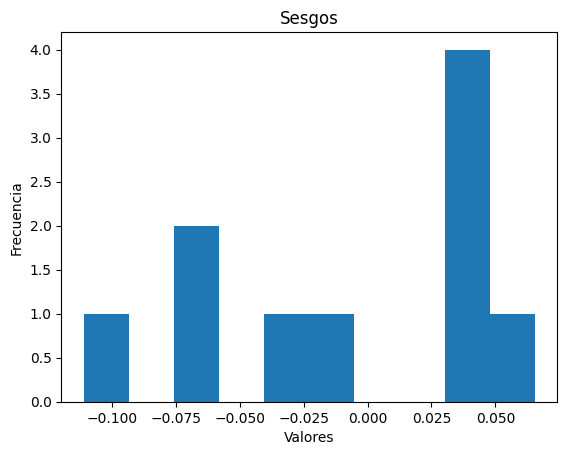

313/313 [==============================] - 2s 5ms/step - loss: 0.3814 - accuracy: 0.8636
Test loss: 0.3814268410205841
Test accuracy: 0.8636000156402588


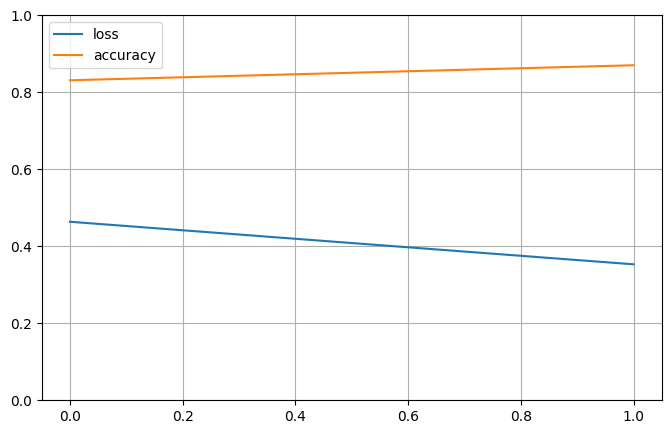

In [31]:
nh1=512
nh2=1024
# Ensure that 'input' is a numpy array or a tensor


RN5121024,RN5121024_testlost,RN5121024_test_acc=Modelo_3(nh1,nh2,training_images,training_labels,10)

***resultados de redes neuronales**

Red Neuronal 1, Modelo2,1 capa oculta,10 epocas, perdidas, precisión: 512, 10, 0.33, 0.879
Red Neuronal 2, Modelo2, 1 capa oculta, 10 epocas, perdidas, precisión: 1024, 10, 0.33, 0.887
Red NEuronal 3, Modelo3,2 capas ocultas, 10 epocas, perdidas, precisión: 0.36, 0.89

*** discusión de resultados**
Se aprecia en las dos redes un aumento insignificante en de la precisión de las predicciones.

*** conclusión**

Las 3 redes neuronales obtinene precisiones por sobre el 80%, lo cual la deja como aceptables, que a su vez es suceptible a ser usadas para la toma de decisiones, sólo indicando que a lo menos 1 de cada 5 datos de al predicción puede que no sea correcta.

Tu respuesta a la pregunta 5.2 aquí:

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [32]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
nh1=300
RN300_10ep,RN300_testlost_10ep,RN300_test_acc_10ep=Modelo_1(nh1,training_images,training_labels,10,opc=0)

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

***resultados de redes neuronales**

"ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."

*** discusión de resultados**
Es evidente el efecto en la red neuronal 1 sin capa Flatten, es un error. y esto ocurre porque, necesita que los datos de entrada se preparen adecuadamente para construir el modelo. Se entiende que aplanar es tomar cada pixel y se ordena en un vector de 1 dimensión.



*** conclusión**
No trabajar sin preparar los datos antes de aplicar las capas.


# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [33]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 300)               235500    
                                                                 
 dense_39 (Dense)            (None, 300)               90300     
                                                                 
 dense_40 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Son 10 salidas por que son 10 categorias de salida

Pasará que las intervalos de probabilidad sólo seran capaces de clasificar 5 categorias.



# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               235500    
                                                                 
 dense_42 (Dense)            (None, 300)               90300     
                                                                 
 dense_43 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-t

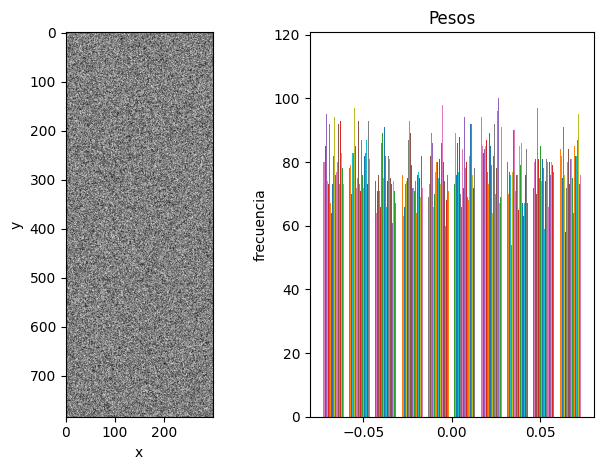

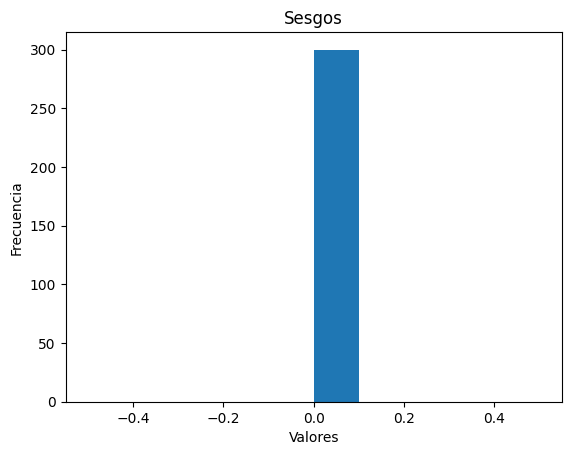

dense_42 Dense


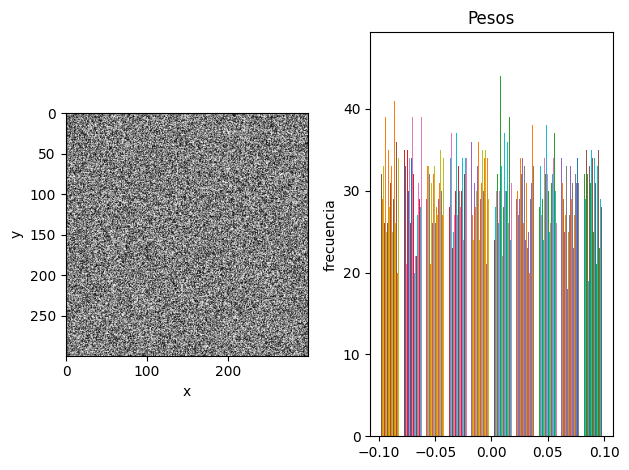

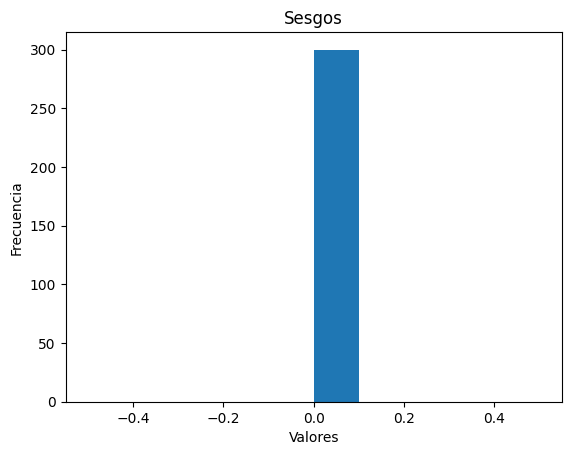

dense_43 Dense


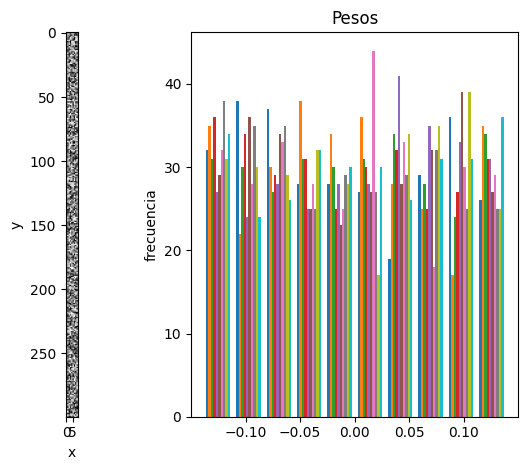

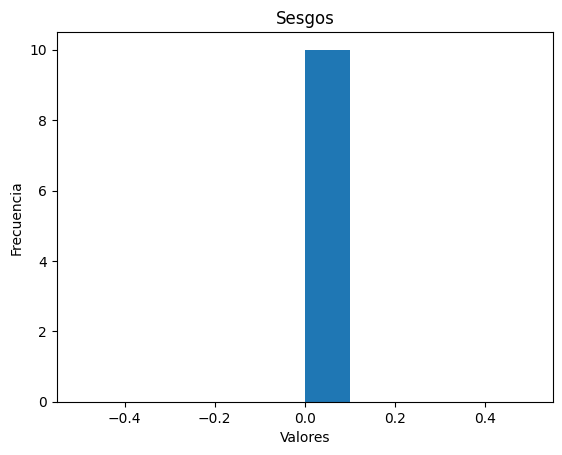

Epoch 1/15
938/938 [==============================] - 9s 9ms/step - loss: 0.4738 - accuracy: 0.8304
Epoch 2/15
938/938 [==============================] - 9s 10ms/step - loss: 0.3546 - accuracy: 0.8684
Epoch 3/15
934/938 [============================>.] - ETA: 0s - loss: 0.3226 - accuracy: 0.8809
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 9s 9ms/step - loss: 0.3227 - accuracy: 0.8809
flatten_16 Flatten
dense_41 Dense


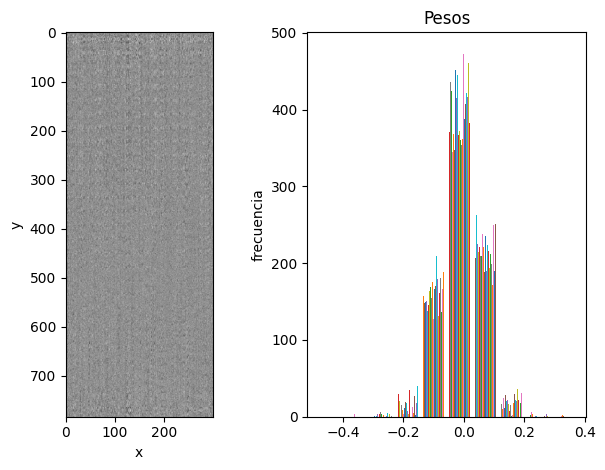

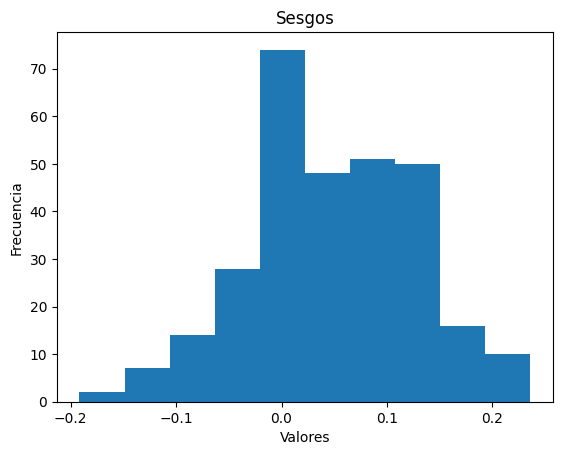

dense_42 Dense


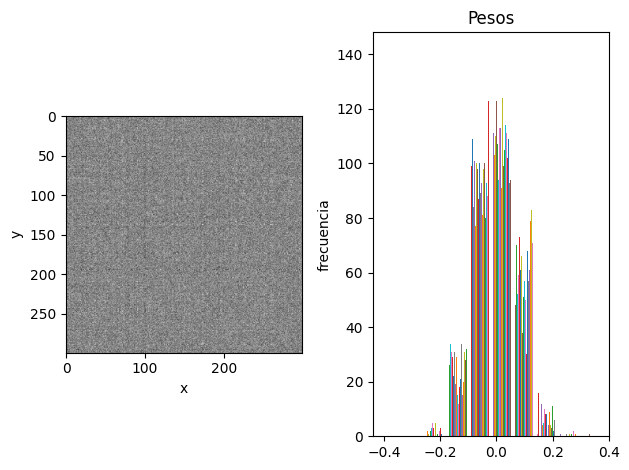

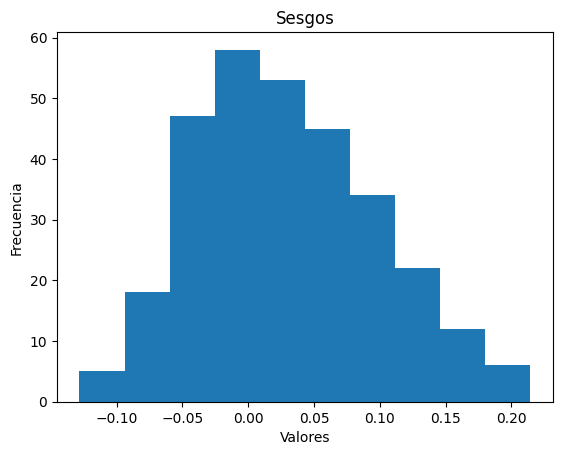

dense_43 Dense


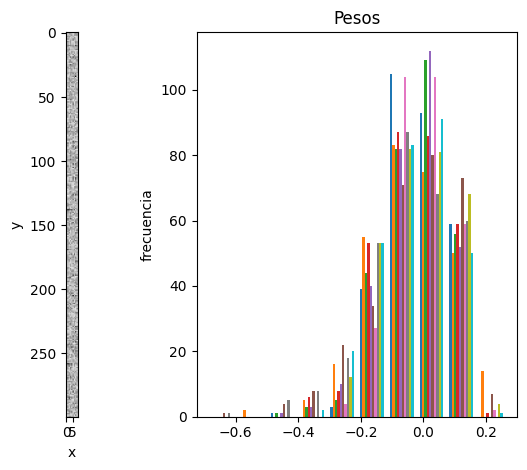

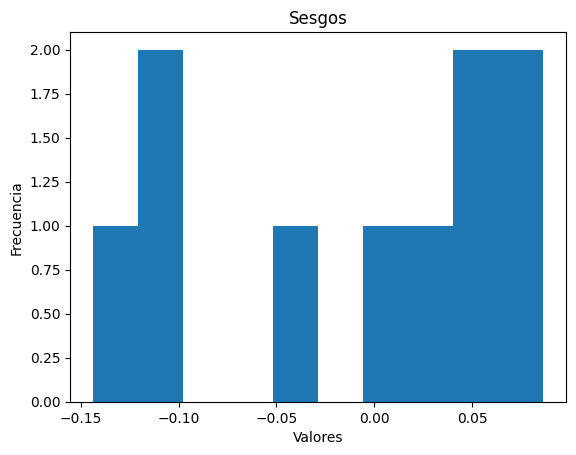

313/313 [==============================] - 2s 5ms/step - loss: 0.3488 - accuracy: 0.8760
Test loss: 0.34880948066711426
Test accuracy: 0.8759999871253967


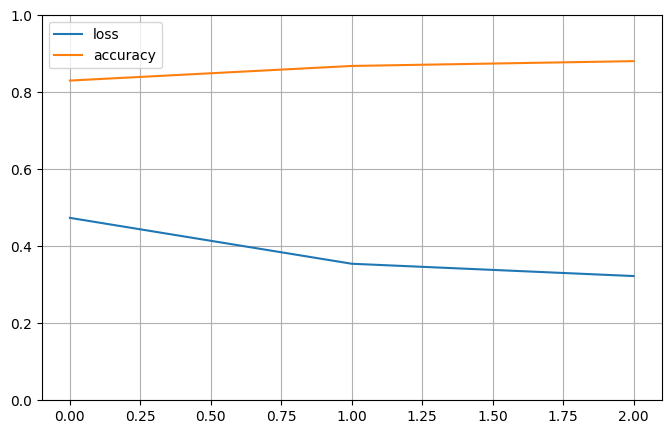

In [34]:
### Tu código para 15 epoch aquí ###

nh1=300
RN300_15ep,RN300_testlost_15ep,RN300_test_acc_15ep=Modelo_1(nh1,training_images,training_labels,15,opc=1)


____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 300)               235500    
                                                                 
 dense_48 (Dense)            (None, 300)               90300     
                                                                 
 dense_49 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-t

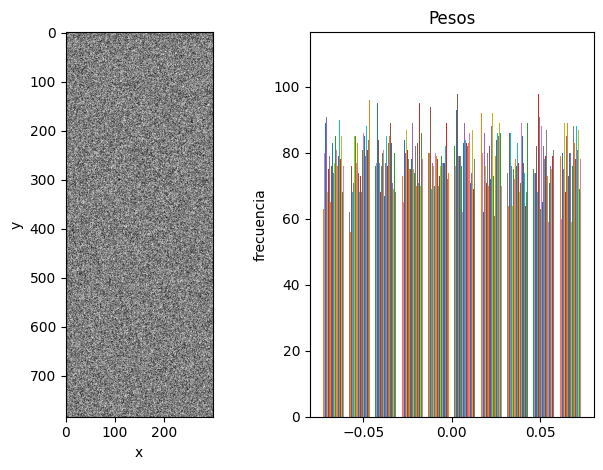

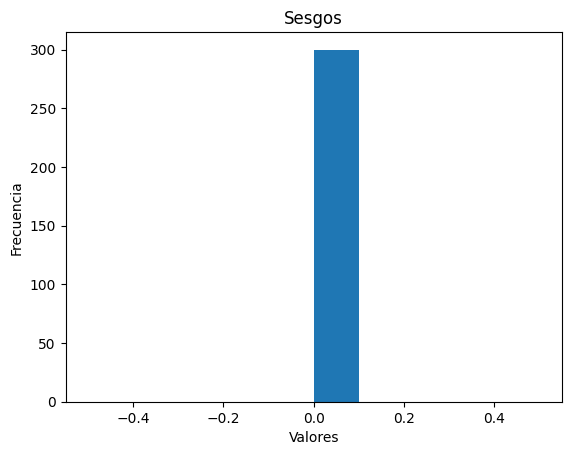

dense_48 Dense


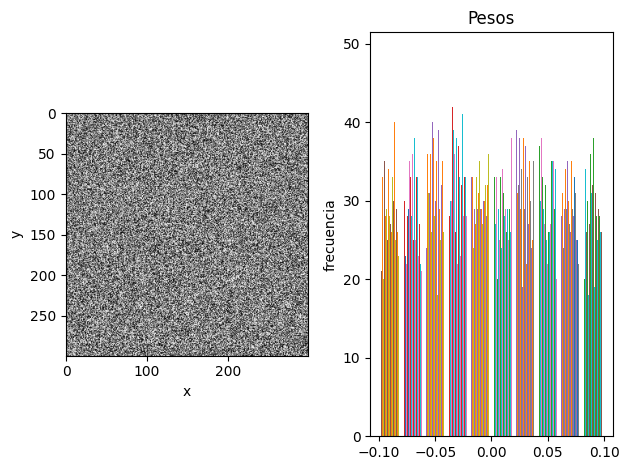

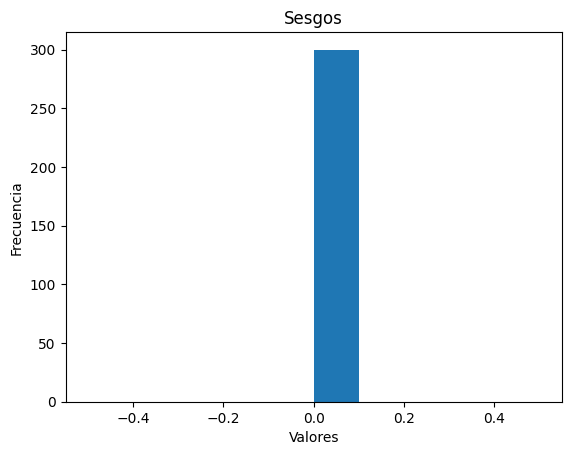

dense_49 Dense


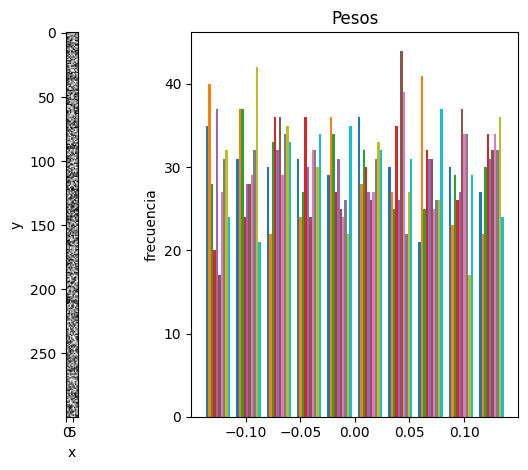

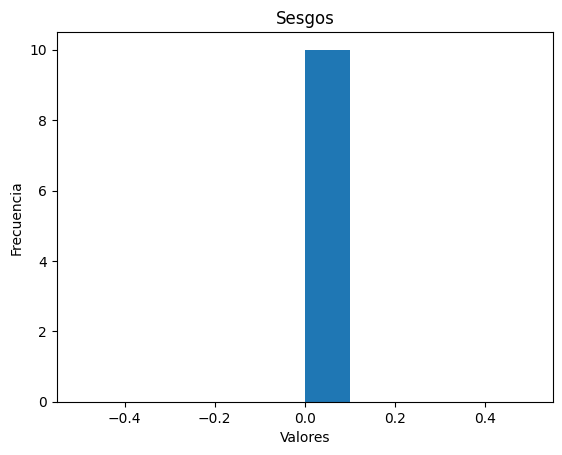

Epoch 1/30
938/938 [==============================] - 10s 10ms/step - loss: 0.4751 - accuracy: 0.8314
Epoch 2/30
935/938 [============================>.] - ETA: 0s - loss: 0.3524 - accuracy: 0.8710
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 8s 8ms/step - loss: 0.3522 - accuracy: 0.8711
flatten_18 Flatten
dense_47 Dense


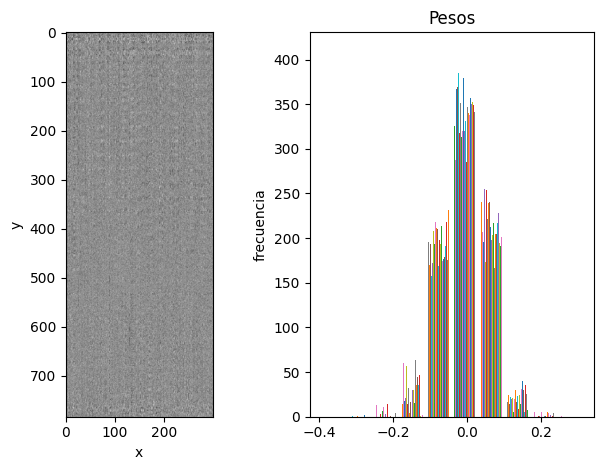

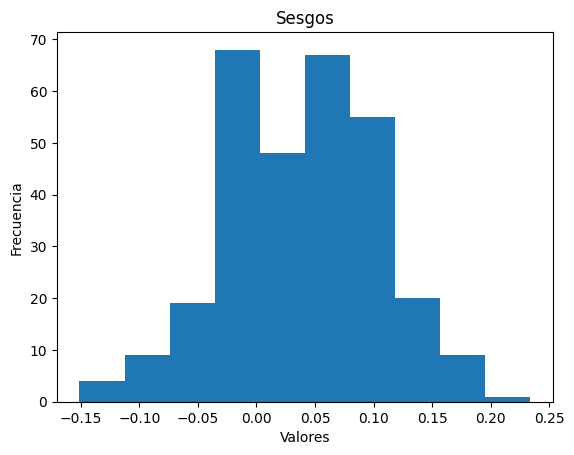

dense_48 Dense


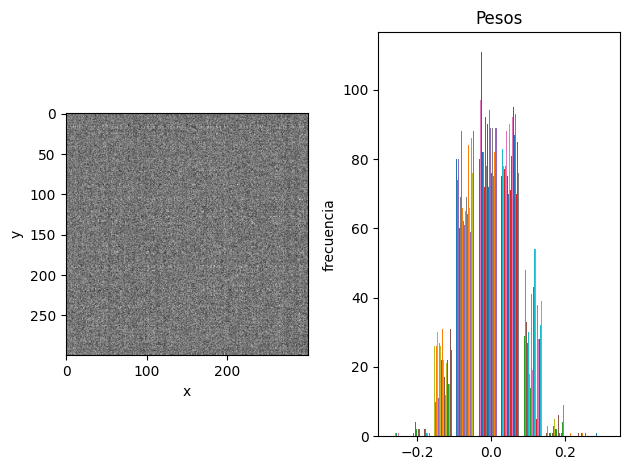

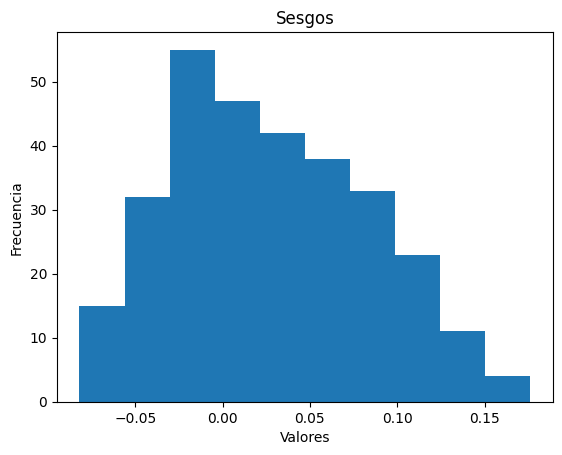

dense_49 Dense


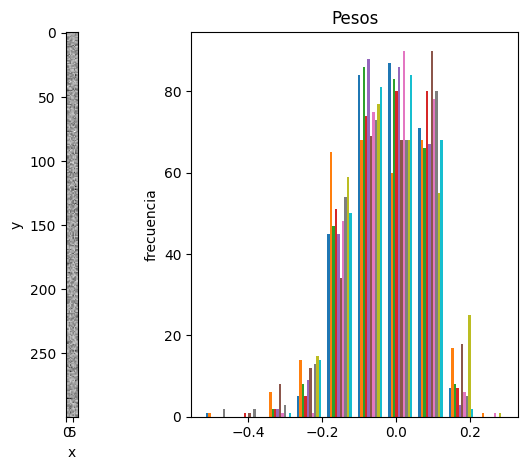

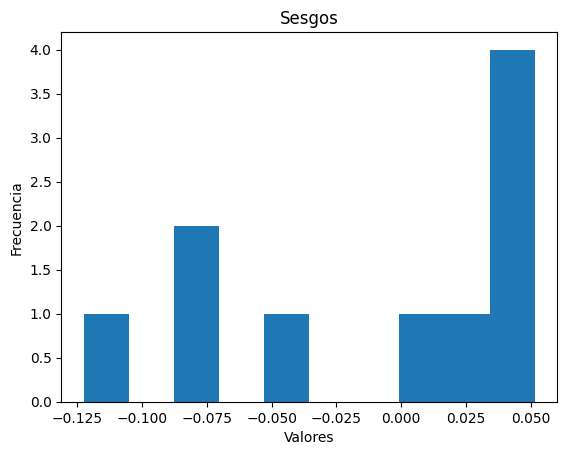

313/313 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8583
Test loss: 0.38721928000450134
Test accuracy: 0.858299970626831


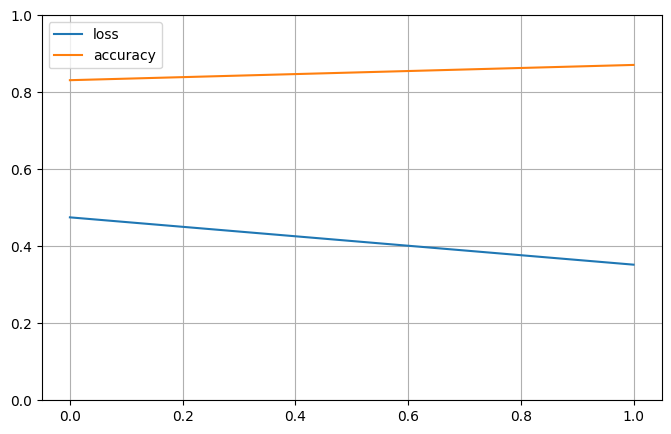

In [36]:
### Tu código para 30 epoch aquí ###
nh1=300
RN300_30ep,RN300_testlost_30ep,RN300_test_acc_30ep=Modelo_1(nh1,training_images,training_labels,30,opc=1)

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 300)               235500    
                                                                 
 dense_54 (Dense)            (None, 300)               90300     
                                                                 
 dense_55 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-t

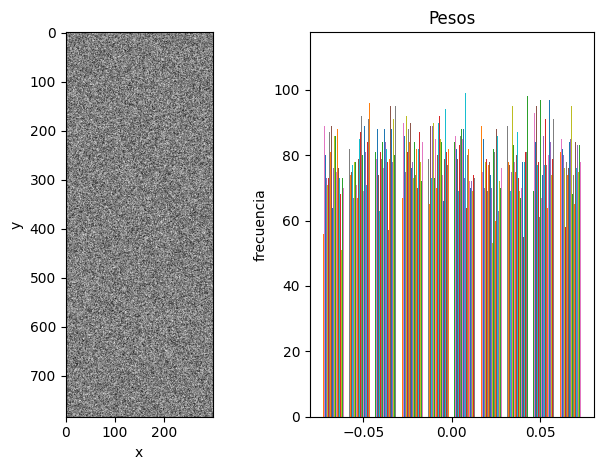

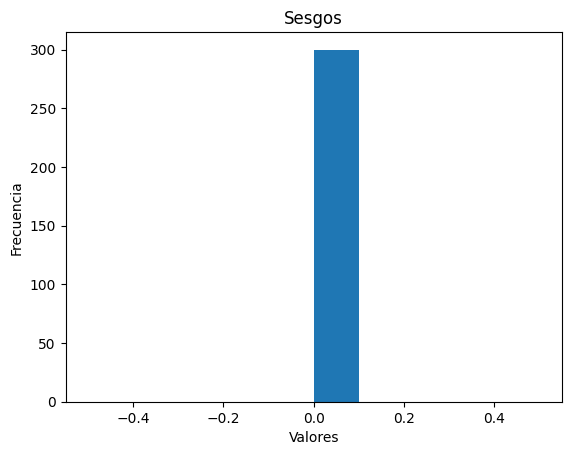

dense_54 Dense


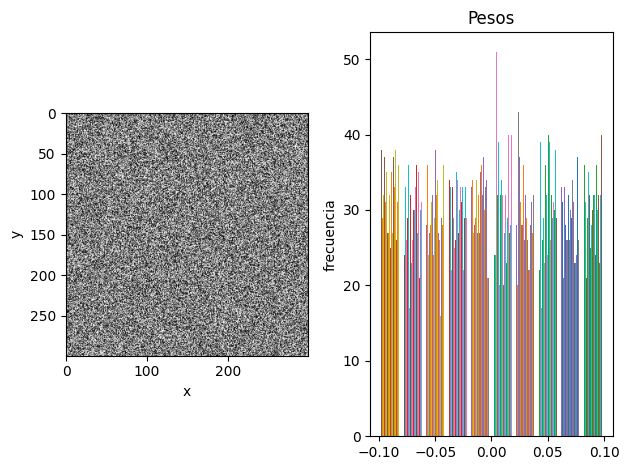

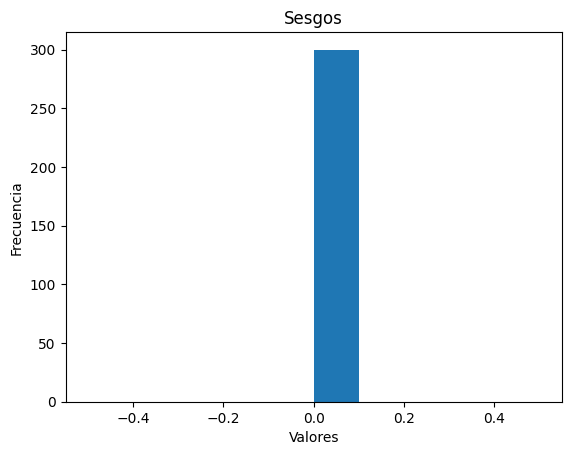

dense_55 Dense


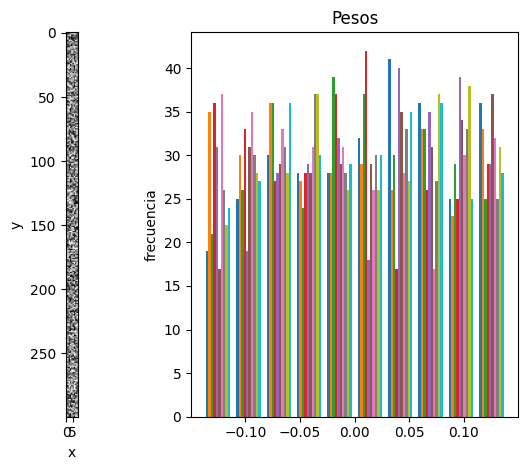

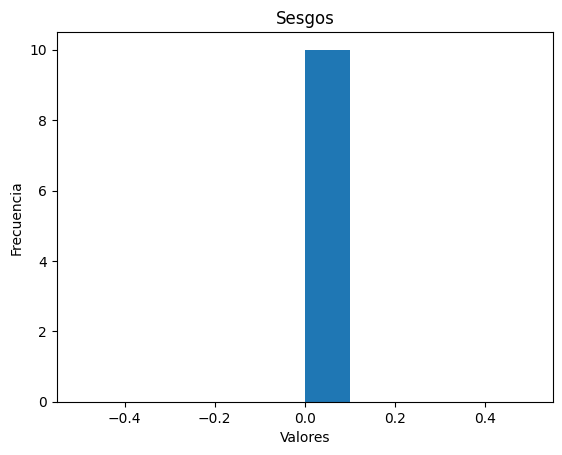

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.4729 - accuracy: 0.8312
Epoch 2/10
936/938 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8704
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 9s 10ms/step - loss: 0.3520 - accuracy: 0.8704
flatten_20 Flatten
dense_53 Dense


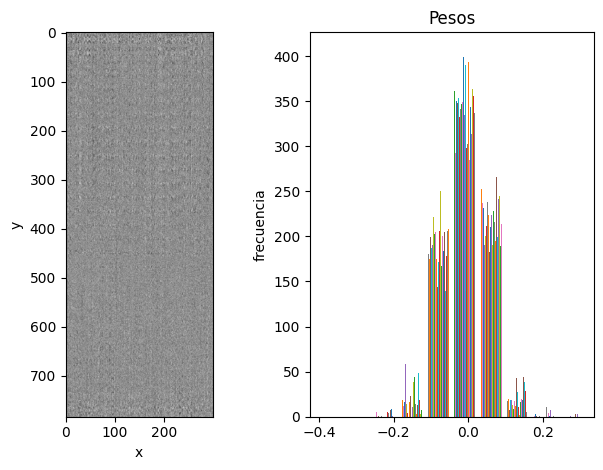

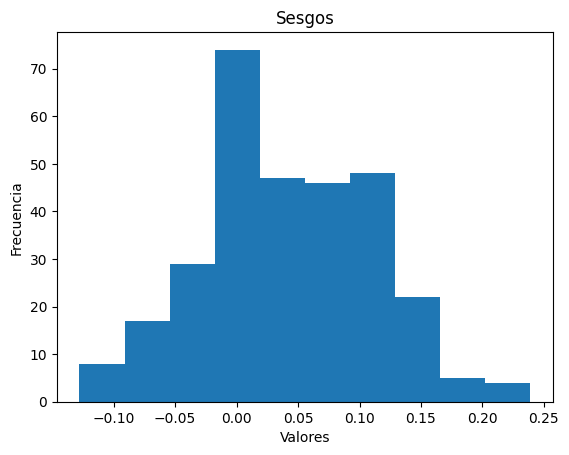

dense_54 Dense


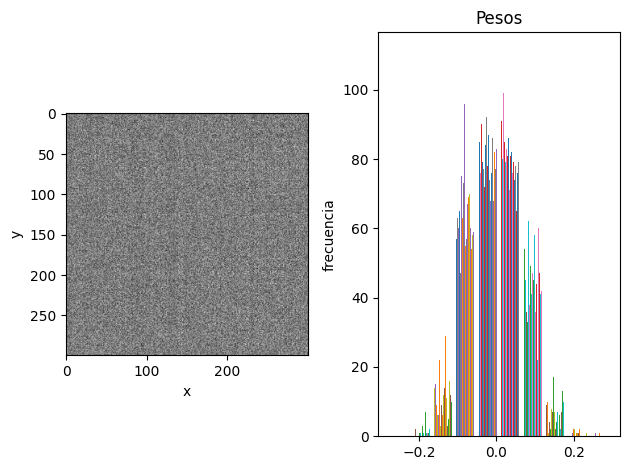

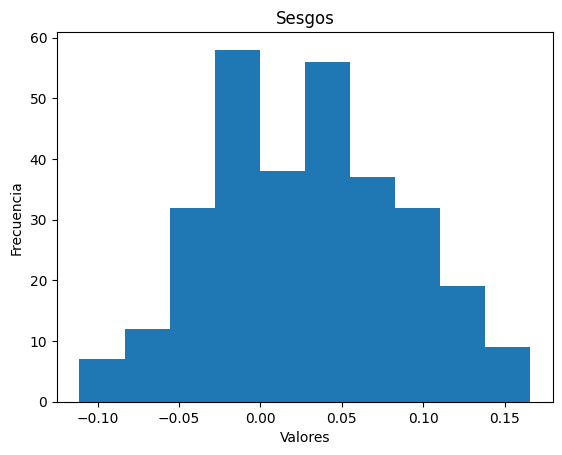

dense_55 Dense


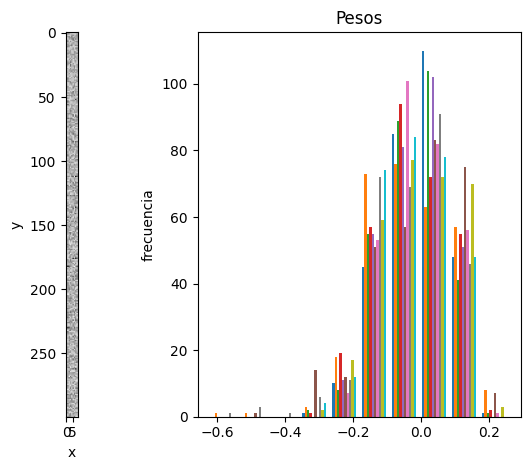

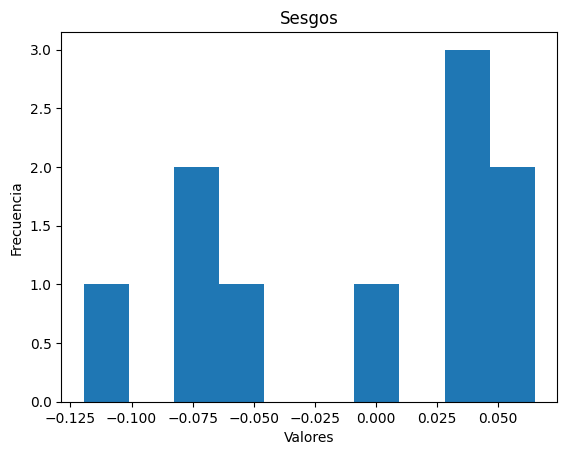

313/313 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8642
Test loss: 0.3650040626525879
Test accuracy: 0.8641999959945679


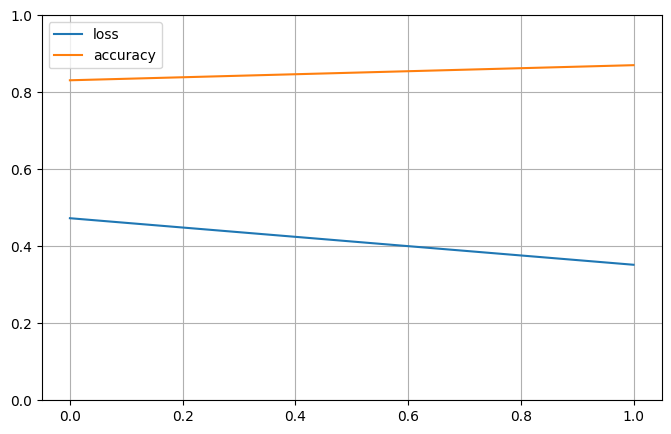

In [38]:
### Tu código para 30 epoch aquí ###
nh1=300
RN300_10ep,RN300_testlost_10ep,RN300_test_acc_10ep=Modelo_1(nh1,training_images,training_labels,10,opc=1)

In [39]:
df_x=pd.DataFrame([[10,RN300_testlost_10ep,RN300_test_acc_10ep],[15,RN300_testlost_15ep,RN300_test_acc_15ep],[30,RN300_testlost_30ep,RN300_test_acc_30ep]],
                  columns=["Epocas","Perdidas","Precisión"])
print(df_x)

   Epocas  Perdidas  Precisión
0      10  0.365004     0.8642
1      15  0.348809     0.8760
2      30  0.387219     0.8583


El aumento de ha diminuido los valores de la función de perdida, y aumenta la precisión

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [40]:


# Instanciar la clase de callback
callbacks = myCallback(0.4,0.87)

# Cargar el conjunto de datos Fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar los datos de imagen
training_images = training_images / 255.0
test_images = test_images / 255.0

# Definir el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])


Epoch 1/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4757 - accuracy: 0.8315
Epoch 2/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3610 - accuracy: 0.8679
Epoch 3/50
1871/1875 [============================>.] - ETA: 0s - loss: 0.3218 - accuracy: 0.8807
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3218 - accuracy: 0.8807


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 300)               235500    
                                                                 
 dense_59 (Dense)            (None, 300)               90300     
                                                                 
 dense_60 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-t

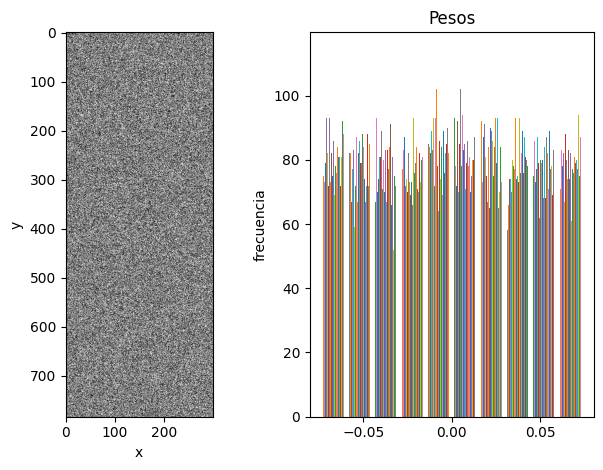

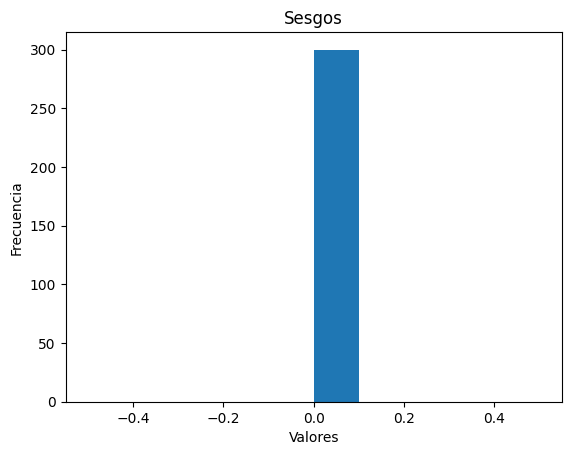

dense_59 Dense


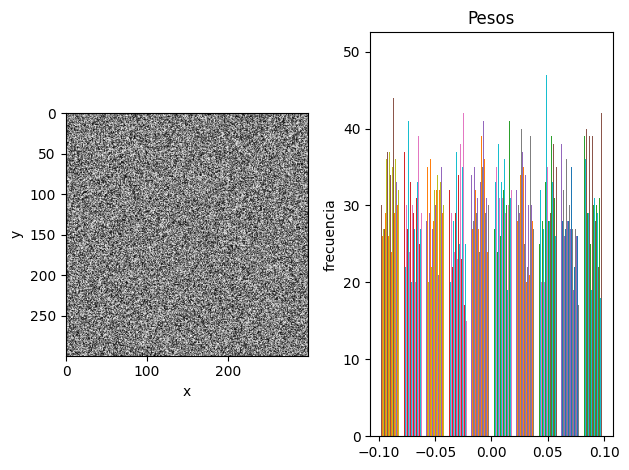

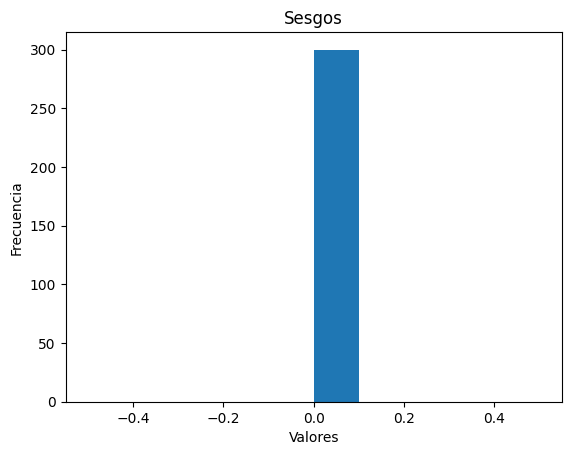

dense_60 Dense


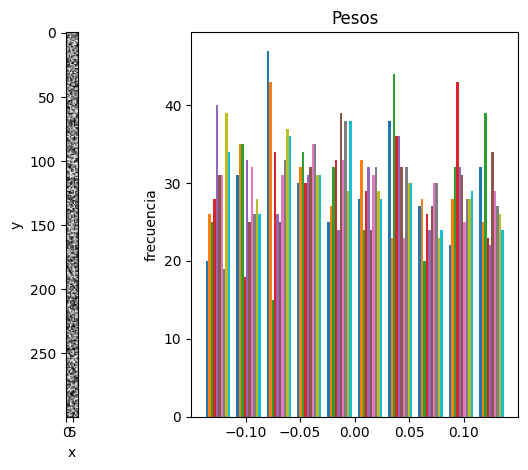

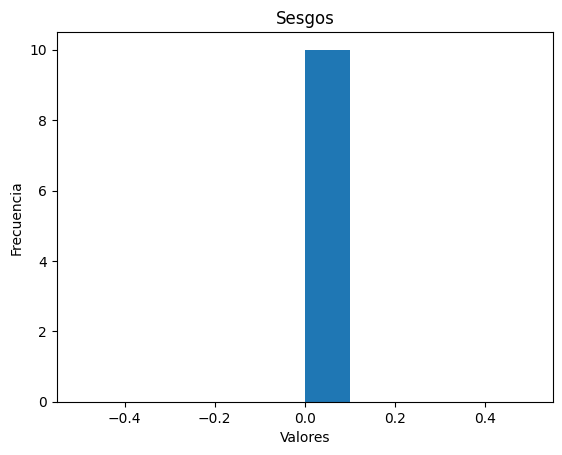

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4807 - accuracy: 0.8273
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3531 - accuracy: 0.8698
Epoch 3/10
937/938 [============================>.] - ETA: 0s - loss: 0.3180 - accuracy: 0.8819
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 9s 10ms/step - loss: 0.3182 - accuracy: 0.8819
flatten_22 Flatten
dense_58 Dense


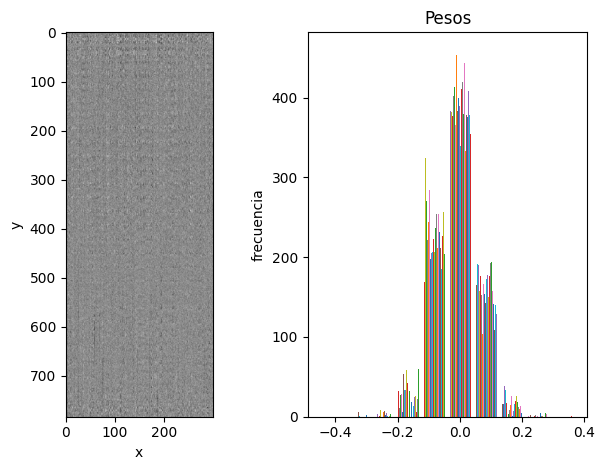

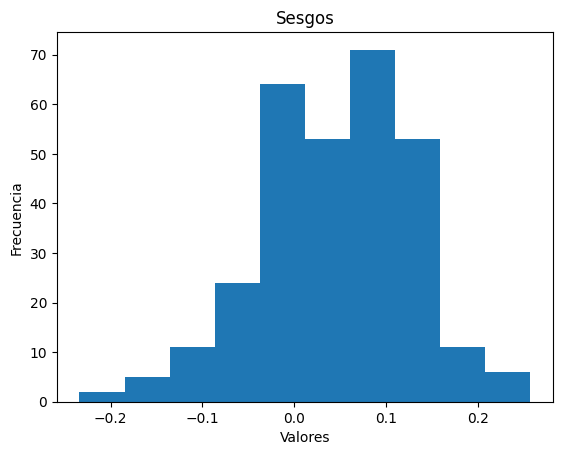

dense_59 Dense


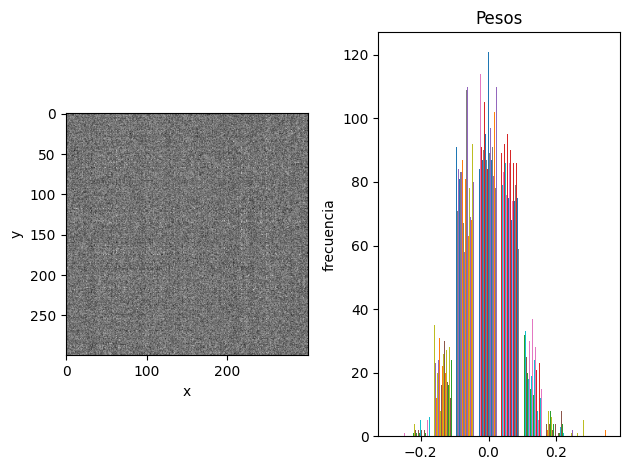

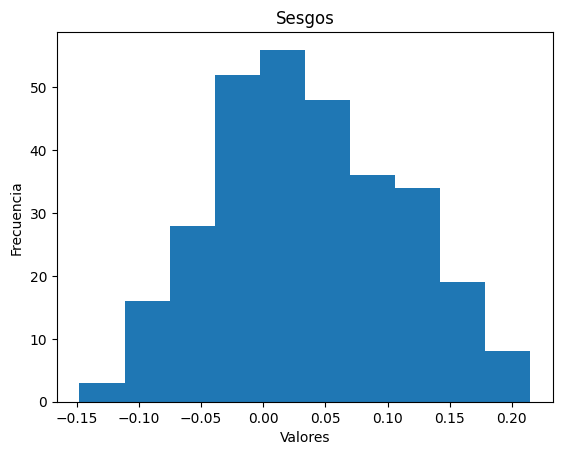

dense_60 Dense


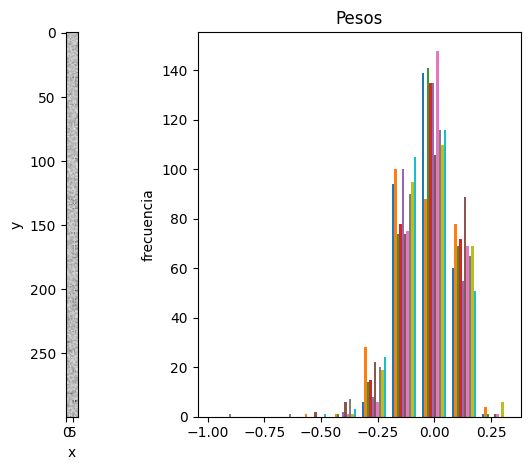

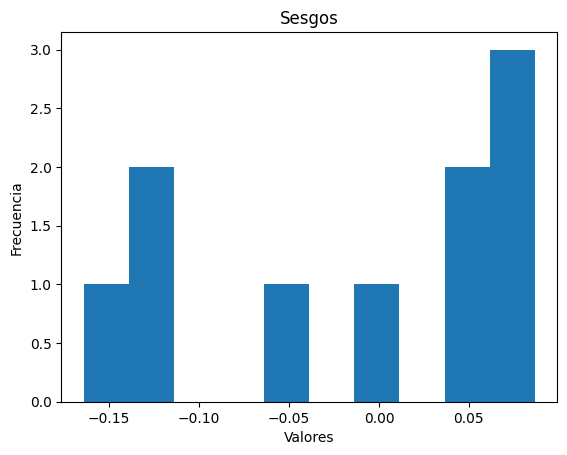

313/313 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8690
Test loss: 0.3546522259712219
Test accuracy: 0.8690000176429749


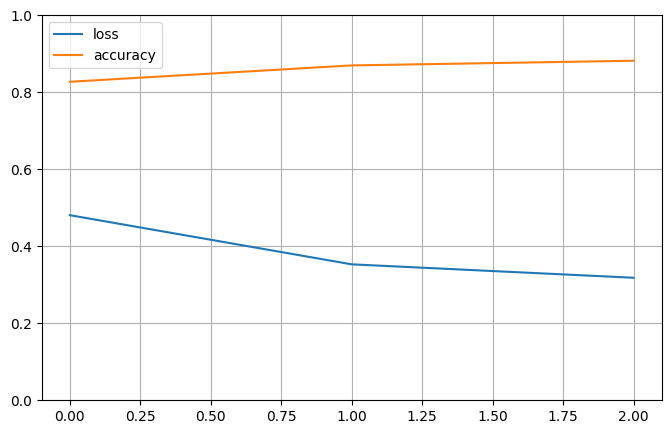

____________________________________________________________________________________________________
Conexiones de la capa Entrada :28x28=784
Conexiones de la capa Oculta :28x28 * 300 + 300=235500
Conexiones de la capa Salida :10 * 300 + 10=3010
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 300)               235500    
                                                                 
 dense_62 (Dense)            (None, 300)               90300     
                                                                 
 dense_63 (Dense)            (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-t

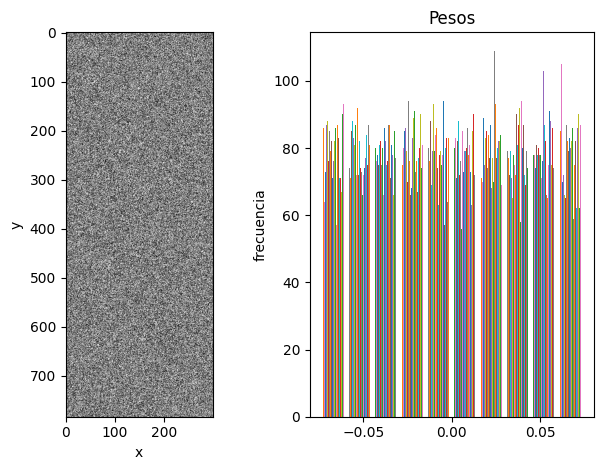

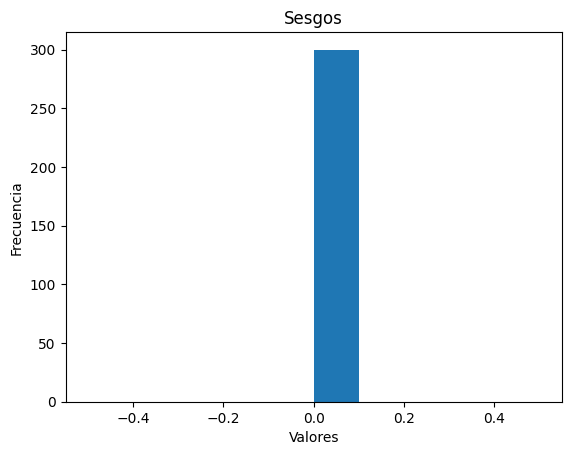

dense_62 Dense


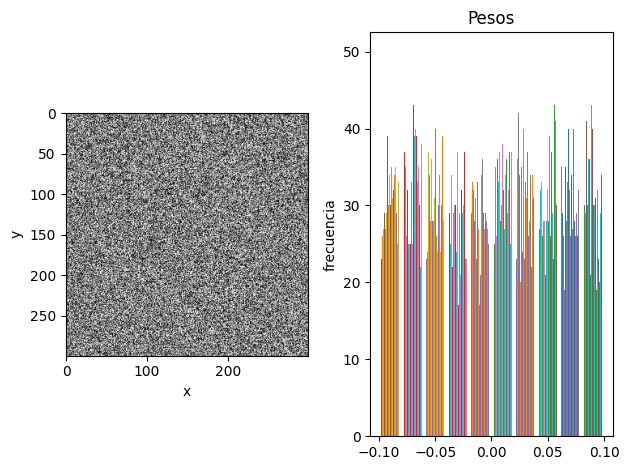

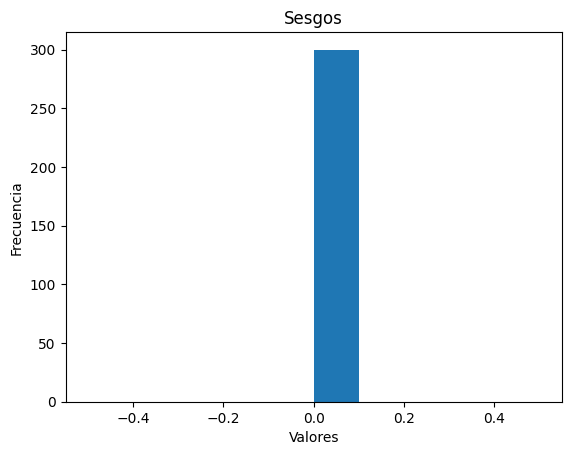

dense_63 Dense


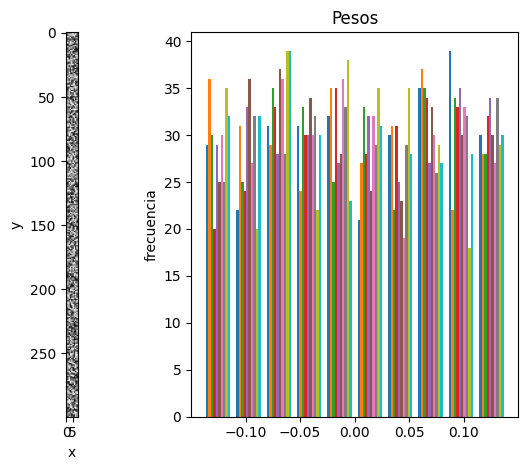

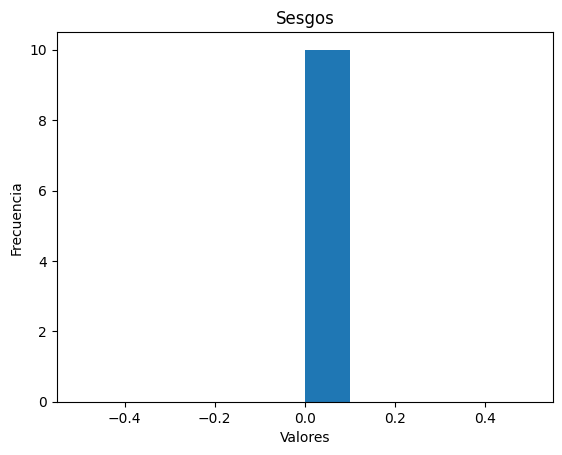

Epoch 1/10
938/938 [==============================] - 11s 12ms/step - loss: 0.5796 - accuracy: 0.7949
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3903 - accuracy: 0.8582
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3579 - accuracy: 0.8698
Epoch 4/10
936/938 [============================>.] - ETA: 0s - loss: 0.3310 - accuracy: 0.8787
Alcanzado el 87.0% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 11s 12ms/step - loss: 0.3311 - accuracy: 0.8786
flatten_23 Flatten
dense_61 Dense


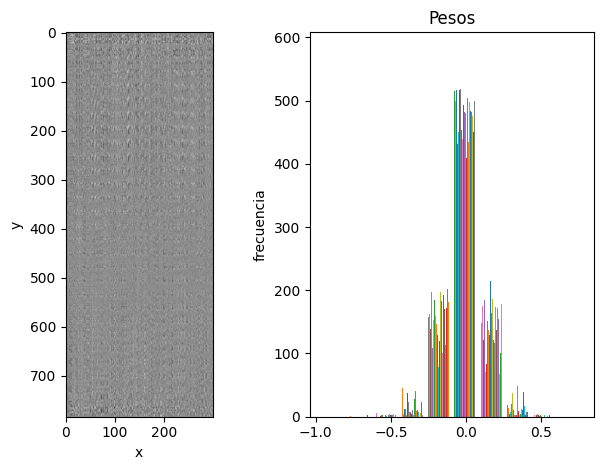

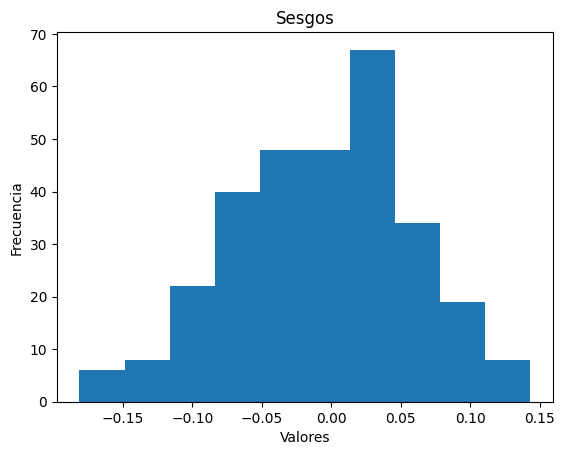

dense_62 Dense


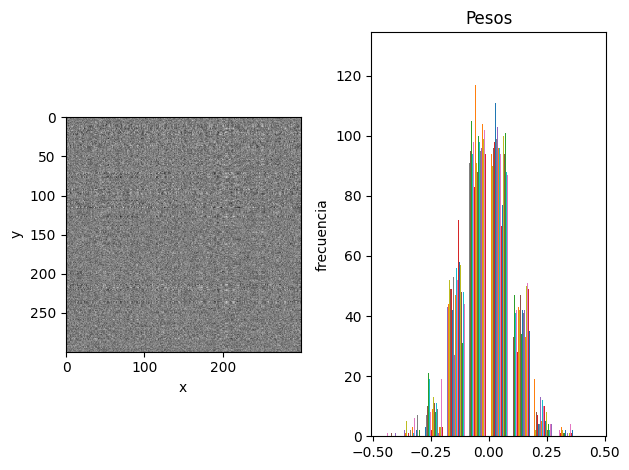

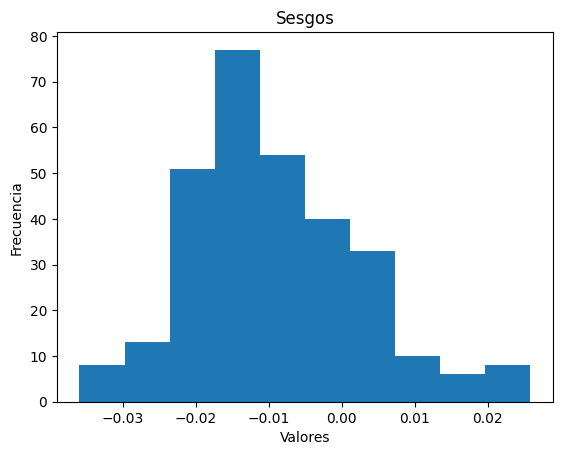

dense_63 Dense


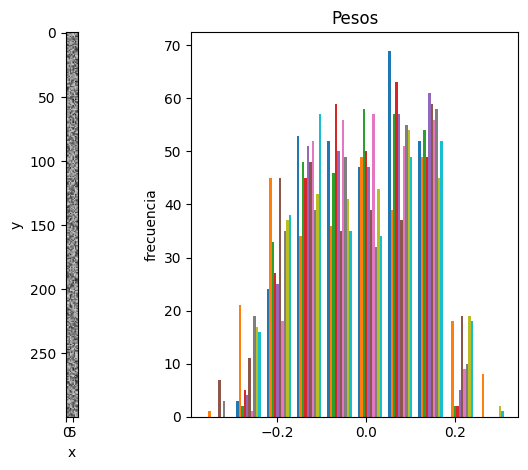

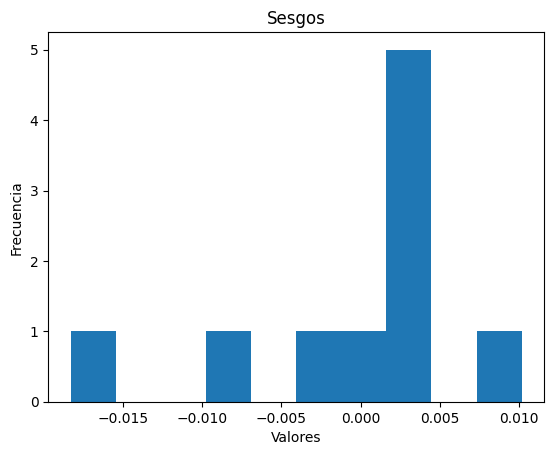

313/313 [==============================] - 1s 4ms/step - loss: 0.3779 - accuracy: 0.8627
Test loss: 0.3778705894947052
Test accuracy: 0.8626999855041504


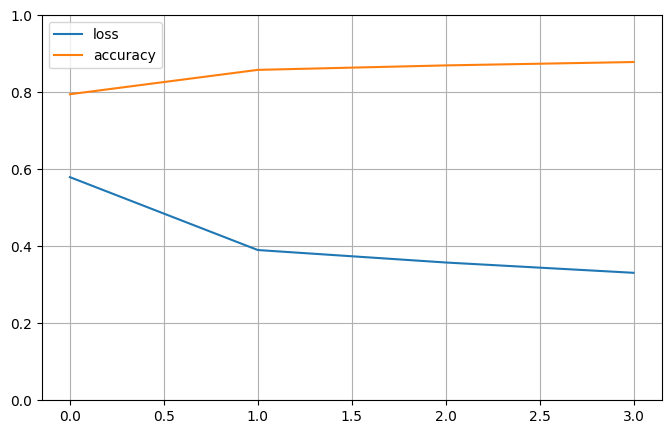

    Perdida  Precision FActivacionCapas
0  0.354652     0.8690             ReLu
1  0.377871     0.8627          sigmoid


In [41]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
### Tu código para 30 epoch aquí ###
nh1=300
RN300_relu,RN300_testlost_relu,RN300_test_acc_relu=Modelo_1b(nh1,training_images,training_labels,10,activacion='relu')
RN300_sigmoid,RN300_testlost_sigmoid,RN300_test_acc_sigmoid=Modelo_1b(nh1,training_images,training_labels,10,activacion='sigmoid')
df_a=pd.DataFrame([[RN300_testlost_relu,RN300_test_acc_relu,'ReLu'],[RN300_testlost_sigmoid,RN300_test_acc_sigmoid,'sigmoid']],
                  columns=['Perdida','Precision','FActivacionCapas'])
print(df_a)

Al comprar ambas funciones de activación se parecia que ReLu, obtiene valores de precisión más altos que sigmoide. Quizas debido a que los pesos poderados de ReLu tienen una concetración de valores más cocnetrada en cero (0) que la función sigmoide que suaviza más la ponderación de pesos.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [42]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform

# Carga de datos
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), _ = mnist.load_data()
training_images = training_images / 255.0

# Modelos con diferentes inicializaciones
initializers = {
    "Zeros": Zeros(),
    "Random Normal": RandomNormal(),
    "Glorot Uniform": GlorotUniform()
}

for name, initializer in initializers.items():
    print(f"Training with {name} initialization")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(training_images, training_labels, epochs=10, verbose=2)
    print("\n")


Training with Zeros initialization
Epoch 1/10
1875/1875 - 13s - loss: 2.3028 - accuracy: 0.0992 - 13s/epoch - 7ms/step
Epoch 2/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0979 - 12s/epoch - 6ms/step
Epoch 3/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0980 - 12s/epoch - 6ms/step
Epoch 4/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0997 - 12s/epoch - 7ms/step
Epoch 5/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0971 - 12s/epoch - 7ms/step
Epoch 6/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0998 - 12s/epoch - 7ms/step
Epoch 7/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0986 - 12s/epoch - 7ms/step
Epoch 8/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0980 - 12s/epoch - 7ms/step
Epoch 9/10
1875/1875 - 14s - loss: 2.3027 - accuracy: 0.1000 - 14s/epoch - 7ms/step
Epoch 10/10
1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0981 - 12s/epoch - 7ms/step


Training with Random Normal initialization
Epoch 1/10
1875/1875 - 13s - loss: 0.4778 - accuracy: 0.8300 - 13s/epoch - 7ms/

***Training with Zeros initialization**

Epoch 10/10

1875/1875 - 12s - loss: 2.3028 - accuracy: 0.0981 - 12s/epoch - 7ms/step

***Training with Random Normal initialization**

Epoch 10/10

1875/1875 - 13s - loss: 0.2210 - accuracy: 0.9171 - 13s/epoch - 7ms/step

***Training with Glorot Uniform initialization**

Epoch 10/10

1875/1875 - 12s - loss: 0.2198 - accuracy: 0.9183 - 12s/epoch - 7ms/step

de las 3 iniciaciones, la Uniforme Glorot es la que alcanza mayor precisión en 10 epocas, y junto a la Normal Aletoria son más consistente que al iniciación en Ceros.  


## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [44]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

for opti in ['adam','SGD', 'RMSprop']:
  model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(training_images, training_labels, epochs=10, verbose=2)
  print("\n")



Epoch 1/10
1875/1875 - 18s - loss: 0.2106 - accuracy: 0.9202 - 18s/epoch - 10ms/step
Epoch 2/10
1875/1875 - 12s - loss: 0.2011 - accuracy: 0.9234 - 12s/epoch - 6ms/step
Epoch 3/10
1875/1875 - 12s - loss: 0.1959 - accuracy: 0.9264 - 12s/epoch - 6ms/step
Epoch 4/10
1875/1875 - 14s - loss: 0.1877 - accuracy: 0.9286 - 14s/epoch - 8ms/step
Epoch 5/10
1875/1875 - 15s - loss: 0.1833 - accuracy: 0.9297 - 15s/epoch - 8ms/step
Epoch 6/10
1875/1875 - 15s - loss: 0.1755 - accuracy: 0.9336 - 15s/epoch - 8ms/step
Epoch 7/10
1875/1875 - 14s - loss: 0.1708 - accuracy: 0.9359 - 14s/epoch - 8ms/step
Epoch 8/10
1875/1875 - 15s - loss: 0.1640 - accuracy: 0.9373 - 15s/epoch - 8ms/step
Epoch 9/10
1875/1875 - 18s - loss: 0.1599 - accuracy: 0.9406 - 18s/epoch - 10ms/step
Epoch 10/10
1875/1875 - 15s - loss: 0.1564 - accuracy: 0.9404 - 15s/epoch - 8ms/step


Epoch 1/10
1875/1875 - 12s - loss: 0.1226 - accuracy: 0.9543 - 12s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 12s - loss: 0.1116 - accuracy: 0.9596 - 12s/epoc

#Optimizador

**Adam**, Epoch 10/10
1875/1875 - 15s - loss: 0.1564 - accuracy: 0.9404 - 15s/epoch - 8ms/step

**SGD**, Epoch 10/10
1875/1875 - 11s - loss: 0.1005 - accuracy: 0.9636 - 11s/epoch - 6ms/step

**RMSprop**, Epoch 10/10
1875/1875 - 12s - loss: 0.1390 - accuracy: 0.9527 - 12s/epoch - 6ms/step

 Los 3 optimizadores (Adam, SGD y RMSprop) obtuvieron excelentes resultados de predicción, todos sobre el 90%.


## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, l1

Epoch 1/100
1500/1500 [==============================] - 13s 7ms/step - loss: 1.4179 - accuracy: 0.6043 - val_loss: 0.8369 - val_accuracy: 0.7911
Epoch 2/100
1500/1500 [==============================] - 12s 8ms/step - loss: 1.0002 - accuracy: 0.7240 - val_loss: 0.6978 - val_accuracy: 0.8045
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9054 - accuracy: 0.7444 - val_loss: 0.6335 - val_accuracy: 0.8183
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8606 - accuracy: 0.7510 - val_loss: 0.6840 - val_accuracy: 0.7972
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.8198 - accuracy: 0.7610 - val_loss: 0.5841 - val_accuracy: 0.8298
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.8011 - accuracy: 0.7676 - val_loss: 0.6092 - val_accuracy: 0.8227
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8065 - accuracy: 0.7656 - val_loss: 0.6794 - v

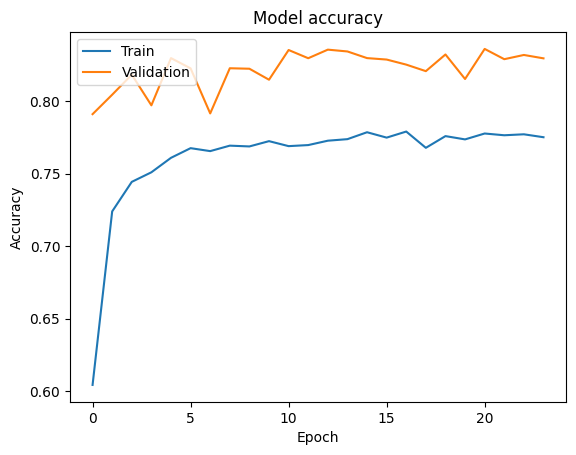

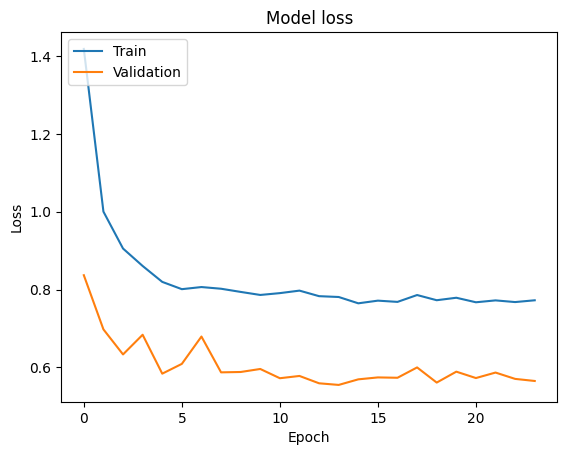

In [47]:
def Modelo_4(layers_config, optimizer_config, batch_size, activation='relu', dropout_rate=0.5, regularization=None, early_stopping_patience=10):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for units in layers_config:
        if regularization == 'l2':
            model.add(Dense(units, activation=activation, kernel_regularizer=l2(0.001)))
        elif regularization == 'l1':
            model.add(Dense(units, activation=activation, kernel_regularizer=l1(0.001)))
        else:
            model.add(Dense(units, activation=activation))

        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    if optimizer_config['type'] == 'Adam':
        optimizer = Adam(learning_rate=optimizer_config['lr'])
    elif optimizer_config['type'] == 'SGD':
        optimizer = SGD(learning_rate=optimizer_config['lr'])
    elif optimizer_config['type'] == 'RMSprop':
        optimizer = RMSprop(learning_rate=optimizer_config['lr'])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping])

    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    return model, history

# Configuración del modelo
layers_config = [128, 64, 32]
optimizer_config = {'type': 'Adam', 'lr': 0.001}
batch_size = 32

# Entrenar el modelo
model, history = Modelo_4(layers_config, optimizer_config, batch_size, activation='relu', dropout_rate=0.5, regularization='l2', early_stopping_patience=10)